<h1>00. EDA</h1>

<p>Insurance Company Benchmark (COIL 2000) Practice<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>



<hr style="border:1px solid gray">

## 0. Introducción

La finalidad de esta práctica es la realización de una análisis exploratorio de datos para el dataset _"Insurance Company Benchmark"_, con el objetivo de lograr un mayor entendimiento de los datos y posteriormente realizar un tratamiento y estimación de los modelos.

Un buen analisis exploratorio nos permitirá resolver el objetivo de negocio de una manera más precisa y elaborar modelos mejores.

En este notebook se explicará el objetivo de negocio buscado, y  los contenidos en los que se estructura el mismo.

### 0.1 Objetivo de negocio

La base de datos  _"Insurance Company Benchmark"_ contiene una serie de registros de diferentes clientes. Cada registro de cliente contiene atributos sociodemográficos y valores que indican el número y contribución de diferentes tipos de pólizas. Encontramos datos categóricos y numéricos.

Las variables del modelo se explican detalladamente en el archivo `Dictionary_processed.md` en la carpeta data.

El objetivo de negocio es, a través del punto de vista de una aseguradora, predecir mediante los datos que disponemos, si un cliente contratará una póliza de seguro de autocaravanas o no.  

Fuente: https://archive-beta.ics.uci.edu/ml/datasets/insurance+company+benchmark+coil+2000#Descriptive

### 0.2 Estructura


1. Librerias utlizadas y entorno 


2. Tratamiento de datos

    - Importación
    - Análisis de tipos de datos
    - Diccionario de datos
    - Variable objetivo


3. Análisis EDA

    - Nombramiento de datos y aspéctos éticos 
    - Análisis de valores duplicados
    - Análisis de valores nulos
    - Gráficos
      - Variables categóricas
      - Variables numéricas
    - Análisis de Outliers.


4. Conclusiones generales


<hr style="border:1px solid gray">

## 1. Librerias utilizadas y entorno.


 Cargamos las librerias a utilizar:

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import sys

Para la realización de esta práctica, se ha utilizado un entorno específico para la asignatura de Aprendizaje Automático: 'machine'

In [2]:
# Verificamos el entorno: machine
!conda info


     active environment : machine
    active env location : C:\Users\vvict\anaconda3\envs\machine
            shell level : 2
       user config file : C:\Users\vvict\.condarc
 populated config files : C:\Users\vvict\.condarc
          conda version : 22.9.0
    conda-build version : 3.21.8
         python version : 3.9.12.final.0
       virtual packages : __cuda=11.1=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\vvict\anaconda3  (writable)
      conda av data dir : C:\Users\vvict\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.c

### 1.1. Importación de funciones

Importamos las funciones que vamos a utilizar durante el EDA.

In [3]:
sys.path.append("../docs")
from Functions import *

<hr style="border:1px solid gray">

## 2. Tratamiento de datos

Para comenzar con el tratamiento de datos, descargamos el dataset de la web donde están alojados: 


https://archive-beta.ics.uci.edu/ml/datasets/insurance+company+benchmark+coil+2000#Descriptive

Dentro del dataset encontramos los siguientes archivos en formato .txt:

`ticdata2000.txt`: Contiene una selección de registros de los clientes incluyendo la variable objetivo 'CARAVAN' que se usarán para la fase de entrenamiento. Para una mejor comprensión trabajaremos con el con el nombre 'training_data'.

`ticeval2000.txt`: Contiene una selección de registros de los clientes sin incluir la variable objetivo 'CARAVAN' que se usarán para la fase de validación. Para una mejor comprensión trabajaremos con el con el nombre 'testing_data'.

`tictgts200.txt`: Contiene la variable 'CARAVAN', que es el valor que se espera de los registros de los clientes en la fase de validación. Para una mejor comprensión trabajaremos con el con el nombre 'targets_data'.

`dictionary.txt`: Contiene un diccionario con el nombre de las variables y el indice de las variables categóricas.

`TicDataDescr.txt`: Descripción del dataset, variable objetivo y diccionario. 


### 2.1. Importación de datos  

Una vez leidos todos los documentos, importaremos unicamente aquellos que contienen los datos a estudiar:`ticdata2000.txt`, `ticeval2000.txt`, `tictgts200.txt`.


In [4]:
path = 'C:/Users/vvict/Documents/Machine Learning/Prácticas/Insurance_Company_Benchmark_Practice/data'

training_data = pd.read_csv(path + '/ticdata2000.txt', sep='\t', header=None)
testing_data = pd.read_csv(path + '/ticeval2000.txt', sep='\t', header=None)
targets_data = pd.read_csv(path + '/tictgts2000.txt', sep='\t', header=None)

####  2.1.1 Comprobamos las filas y columnas de los diferentes dataframes

In [5]:
# Comprobamos los datos de training.

print("El DF training_data contiene " + str(training_data.shape[0]) +" filas y " + str(training_data.shape[1]) + " columnas")

El DF training_data contiene 5822 filas y 86 columnas


In [6]:
# Comprobamos los datos de testing.

print("El DF testing_data contiene " + str(testing_data.shape[0]) +" filas y " + str(testing_data.shape[1]) + " columnas")

El DF testing_data contiene 4000 filas y 85 columnas


In [7]:
# Comprobamos los targets de testing.

print("El DF targets_data contiene " + str(targets_data.shape[0]) +" filas y " + str(targets_data.shape[1]) + " columnas")

El DF targets_data contiene 4000 filas y 1 columnas


#### 2.1.2 Inclusión y nombramiento de las variables

En esta sección juntaremos los datos de `testing_data` con los de `targets_data` para poder unificar todos los datos en un solo dataframe y facilitar la transformación del conjunto en el caso de que sea necesario. 

Dado que el nombre de las variables vienen aparte en el archivo `TicDataDescr.txt`, Procedemos a incluirlas en nuestro dataframe manualmente.


In [8]:
# Unimos la variable target al dataframe testing_data. Asignandole al nuevo dataframe el nombre : 'testing_data_with_targets'.
testing_data_with_targets = pd.concat([testing_data, targets_data], axis=1)


In [9]:
# Asignamos el nombre a las variables de 'testing_data_with_targets'.

testing_data_with_targets.columns = ['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD', 'MGODRK', 'MGODPR','MGODOV','MGODGE','MRELGE', 'MRELSA',
                                    'MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER',
                                    'MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2',
                                    'MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART',
                                    'PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN',
                                    'PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR',
                                    'AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG',
                                    'AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN']

In [10]:
# Comprobamos que se hayan añadido los nombres.
testing_data_with_targets.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,0


Procedemos a añadir el nombre de las columnas en el dataframe `training_data`.

In [11]:
training_data.columns =['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD', 'MGODRK', 'MGODPR','MGODOV','MGODGE','MRELGE', 'MRELSA',
                        'MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER',
                        'MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2',
                        'MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART',
                        'PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN',
                        'PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR',
                        'AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG',
                        'AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN']

Dado que tenemos dos dataframes, uno de training y otro de testing, vamos a añadir una nueva columna para diferenciarlas en el dataset unificado.

In [12]:
testing_data_with_targets['test_set'] = 1
training_data['test_set'] = 0

Una vez asignados los nombre de las variables y diferenciados entre training y test procedemos a juntar las dos tablas en el dataframe `full_dataset` y comprobamos sus filas y columnas.

In [13]:
full_dataset= pd.concat([training_data, testing_data_with_targets], axis=0)


In [14]:
#Reestablecemos el indice para que se ordene el ID tras haberlas juntado los dos dataframes.
full_dataset.reset_index(drop=True, inplace=True)

In [15]:
print("El DF targets_data contiene " + str(full_dataset.shape[0]) +" filas y " + str(full_dataset.shape[1]) + " columnas")
full_dataset.head()


El DF targets_data contiene 9822 filas y 87 columnas


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,test_set
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0,0


### 2.2. Análisis de tipo de datos

Analizamos el tipo de dato que forma cada variable

In [16]:
# Comprobamosel nº de datos que hay de diferentes tipos.
print(full_dataset.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index())

full_dataset.dtypes 

  feature_type  count
0        int64     87


MOSTYPE     int64
MAANTHUI    int64
MGEMOMV     int64
MGEMLEEF    int64
MOSHOOFD    int64
            ...  
AFIETS      int64
AINBOED     int64
ABYSTAND    int64
CARAVAN     int64
test_set    int64
Length: 87, dtype: object

Observamos que la totalidad de las variables están compuestas por **datos de tipo entero**. No existen ni datos de tipo 'string' ni datos que parezcan que puedan estar erroneos, por lo que en este caso no será necesario realizar ninguna transformación sobre las variables. 

### 2.2. Diccionario de datos

Dentro del dataset venía incluido un diccioanrio de datos con la descripción de cada variable. Sin embargo para un mayor entendimiento de los datos he procedido a crear uno nuevo, llamado `Dictionary.md` que se encuentra en la carpeta `docs`. 

En el encontramos información detallada de cada una de las variables: Nombre, descripción, tipo de variable, tipo de dato y rango.

En cuanto al contenido de los datos, observamos que las **primeras 43 variables se refieren a datos sociodemográficos**, relacionados con el código postal, de manera que si dos clientes viven en un mismo codigo postal van a tener los mismos valores.

En cuanto a **las variables restantes se refieren a la titularidad de la pólizas de seguro y contribuciones**.

En el diccionario encontramos dos tipos de variables:

- **Categóricas (63 variables), las cuales tienen su significado numérico explicado en el diccionario**

- **Numéricas discretas (23 variables)** 


### 2.3. Variable Objetivo

La variable objetivo del dataset es el valor **`CARAVAN`**, la cual indica si los clientes contratarán o no una poliza de autocaravanas. La variable toma valor de **1 en el caso de contratar la poliza** y de **0 en el caso de no contratarla**. 

In [17]:
# Comprobamos que los valores únicos de caravan son 0 y 1.

print(full_dataset.CARAVAN.unique())

[0 1]


In [18]:
# Seleccionamos los valores de training para ver la proporción de la variable objetivo.
classes_overview(df = training_data, obj_val = 'CARAVAN')


,index,porcentaje,CARAVAN
0,0,94.022673,5474
1,1,5.977327,348


Observamos que de los datos analizados unicamente casi un 6% se decanta por adquirir una poliza de autocaravanas, mientras que la gran mayoria el 94% restante opta por no adquirirla. **La variable objetivo está desbalanceada**.

<hr style="border:2px solid gray">

## 3. Analisis EDA

Para realizar el EDA unicamente nos centraremos en la selección de datos de training. Por lo que los datos de test los dejaremos intactos salvo que realicemos alguna transformación.

### 3.1. Nombramiento de datos y aspéctos éticos 

Dado que el nombre de las variables no aportaban mucha información, he procedido a renombrarlas para trabajar más facilmente con los datos.

In [19]:
# Cambio de nombre de las variables.
new_names = ['customer_subtype','num_houses','household_size','avg_age','customer_maintype', 'religion_catholic', 'religion_protestant','religion_other','religion_no','relation_married', 'relation_living_together',
                                    'relation_other','relation_singles','children_no','children_yes','education_highlev','education_medlev','education_lowlev','status_high','status_entrepreneur','status_farmer',
                                    'status_middle_management','labourers_skill','labourers_unskill','social_class_a','social_class_b1','social_class_b2','social_class_c','social_class_d','home_rented',
                                    'home_owners','car_1','car_2','car_no','health_national','health_private','income_-30k','income_30_45','income_45_75','income_75_122','income_+123','income_avg',
                                    'purchase_power_class','contrib_third_party_insurance','contrib_third_party_firms','contrib_third_party_agriculture','contrib_car_policies','contrib_van_policies','contrib_motorcycle_policies',
                                    'contrib_lorry_policies','contrib_trailer_policies','contrib_tractor_policies','contrib_agric_machines_policies','contrib_moped_policies','contrib_life_insurance','contrib_priv_accident_insurance','contrib_family_accident_insurance',
                                    'contrib_disability_insurance','contrib_fire_policies','contrib_surfboard_policies','contrib_boat_policies','contrib_bycycle_policies','contrib_property_policies','contrib_socialsec_policies','num_private_third_party_insurance',
                                    'num_third_party_firms','num_third_party_agric','num_car','num_van','num_motorcycle','num_lorry','num_trailer','num_tractor','num_agric_machines','num_moped','num_life_insurances',
                                    'num_private_accident_insurances','num_fam_accident_insurances','num_disability_insurances','num_fire','num_surfboard','num_boat','num_bycyle','num_property_insurance','num_socsec_insurance','num_mobile_home', 'test_set']

# Comprobamos que el número de nombres introducidos coinciden con el número de nombres originales.
print(len(full_dataset.columns) == len(new_names))

# Reemplazamos los nombres.
full_dataset.columns = new_names

# Mostramos parte de la tabla para comprobar los nuevos nombres
full_dataset.head()

True


,customer_subtype,num_houses,household_size,avg_age,customer_maintype,religion_catholic,religion_protestant,religion_other,religion_no,relation_married,...,num_fam_accident_insurances,num_disability_insurances,num_fire,num_surfboard,num_boat,num_bycyle,num_property_insurance,num_socsec_insurance,num_mobile_home,test_set
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0,0


Una vez renombradas la variables vamos a **eliminar aquellas que no tengan un uso ético** dentro del análisis de datos, como son los datos relacionados con la **religión** y **orientación sexual**.

En este caso concreto encontramos unicamente datos relacionados con la religión, que son las variables **`religion_catholic`, `religion_protestant`, `religion_other` y `religion_no`**, por lo que procedemos a eliminarlos de nuestro dataset.

In [20]:
#Eliminamos las columnas mencionadas.
columnas_a_borrar = ['religion_catholic', 'religion_protestant', 'religion_protestant', 'religion_other','religion_no' ] 

full_dataset = full_dataset.drop(columnas_a_borrar, axis=1)

In [21]:
# Comprobamos que las columnas han sido elminadas.
full_dataset.columns.to_list()

['customer_subtype',
 'num_houses',
 'household_size',
 'avg_age',
 'customer_maintype',
 'relation_married',
 'relation_living_together',
 'relation_other',
 'relation_singles',
 'children_no',
 'children_yes',
 'education_highlev',
 'education_medlev',
 'education_lowlev',
 'status_high',
 'status_entrepreneur',
 'status_farmer',
 'status_middle_management',
 'labourers_skill',
 'labourers_unskill',
 'social_class_a',
 'social_class_b1',
 'social_class_b2',
 'social_class_c',
 'social_class_d',
 'home_rented',
 'home_owners',
 'car_1',
 'car_2',
 'car_no',
 'health_national',
 'health_private',
 'income_-30k',
 'income_30_45',
 'income_45_75',
 'income_75_122',
 'income_+123',
 'income_avg',
 'purchase_power_class',
 'contrib_third_party_insurance',
 'contrib_third_party_firms',
 'contrib_third_party_agriculture',
 'contrib_car_policies',
 'contrib_van_policies',
 'contrib_motorcycle_policies',
 'contrib_lorry_policies',
 'contrib_trailer_policies',
 'contrib_tractor_policies',
 'con

Una vez realizadas las anteriores transformaciones, procedo a quedarme con la selección de datos de training.

In [22]:
training_dataset = full_dataset[full_dataset['test_set']== 0]

### 3.2. Análisis de valores duplicados

Como parte del EDA, vamos a proceder a comprobar si existen valores duplicado, y en caso de que existan analizarlos y tomar una decisión.

In [23]:
# Creamos un DF con los duplicados existentes en la selección de training.
duplicados = training_dataset[training_dataset.duplicated()]

len(duplicados)

602

Observamos que existen **602 registros duplicados**. 

Sin embargo, dado que en el diccionario se menciona que los valores sociodemográficos son los mismos para aquellas personas que vivan en el mismo código postal puede caber la posibilidad de que existan personas del mismo barrio con el mismo número de pólizas y contribuciones. Es por esta razón que **no vamos a desechar los datos** y vamos a seguir trabajando con ellos.

### 3.3 Análisis de valores nulos

Procedemos a comprobar si dentro de nuestras variables existe algún valor nulo

In [24]:
# Creamos DF con recuento de valores nulos
null_df = training_dataset.isnull().sum().reset_index()
null_df.columns = ['column_name', 'NAs']

# Seleccionamos aquellas variables con 1 o más valores nulos
null_df[null_df.NAs > 0]

,column_name,NAs


Observamos que **NO existen valores nulos** en este DF, por lo que no es necesario hacer nuevas transformaciones de datos.

### 3.4. Gráficos

#### 3.4.1 Variables categóricas

Creamos un DF unicamente con las variables categóricas para sacar sus gráficos en función de la variable objetivo y analizarlos.

In [25]:
# Creamos un DF unicamente con las variables categóricas para su analisis llamado 'categoric_dataset'

categoric_dataset = training_dataset[['avg_age','customer_maintype','relation_married', 'relation_living_together',
                                    'relation_other','relation_singles','children_no','children_yes','education_highlev','education_medlev','education_lowlev','status_high','status_entrepreneur','status_farmer',
                                    'status_middle_management','labourers_skill','labourers_unskill','social_class_a','social_class_b1','social_class_b2','social_class_c','social_class_d','home_rented',
                                    'home_owners','car_1','car_2','car_no','health_national','health_private','income_-30k','income_30_45','income_45_75','income_75_122','income_+123','income_avg',
                                    'purchase_power_class','contrib_third_party_insurance','contrib_third_party_firms','contrib_third_party_agriculture','contrib_car_policies','contrib_van_policies','contrib_motorcycle_policies',
                                    'contrib_lorry_policies','contrib_trailer_policies','contrib_tractor_policies','contrib_agric_machines_policies','contrib_moped_policies','contrib_life_insurance','contrib_priv_accident_insurance','contrib_family_accident_insurance',
                                    'contrib_disability_insurance','contrib_fire_policies','contrib_surfboard_policies','contrib_boat_policies','contrib_bycycle_policies','contrib_property_policies','contrib_socialsec_policies','customer_subtype', 'num_mobile_home']]

# Comprobamos el DF creado.
categoric_dataset.head()

,avg_age,customer_maintype,relation_married,relation_living_together,relation_other,relation_singles,children_no,children_yes,education_highlev,education_medlev,...,contrib_family_accident_insurance,contrib_disability_insurance,contrib_fire_policies,contrib_surfboard_policies,contrib_boat_policies,contrib_bycycle_policies,contrib_property_policies,contrib_socialsec_policies,customer_subtype,num_mobile_home
0,2,8,7,0,2,1,2,6,1,2,...,0,0,5,0,0,0,0,0,33,0
1,2,8,6,2,2,0,4,5,0,5,...,0,0,2,0,0,0,0,0,37,0
2,2,8,3,2,4,4,4,2,0,5,...,0,0,2,0,0,0,0,0,37,0
3,3,3,5,2,2,2,3,4,3,4,...,0,0,2,0,0,0,0,0,9,0
4,2,10,7,1,2,2,4,4,5,4,...,0,0,6,0,0,0,0,0,40,0


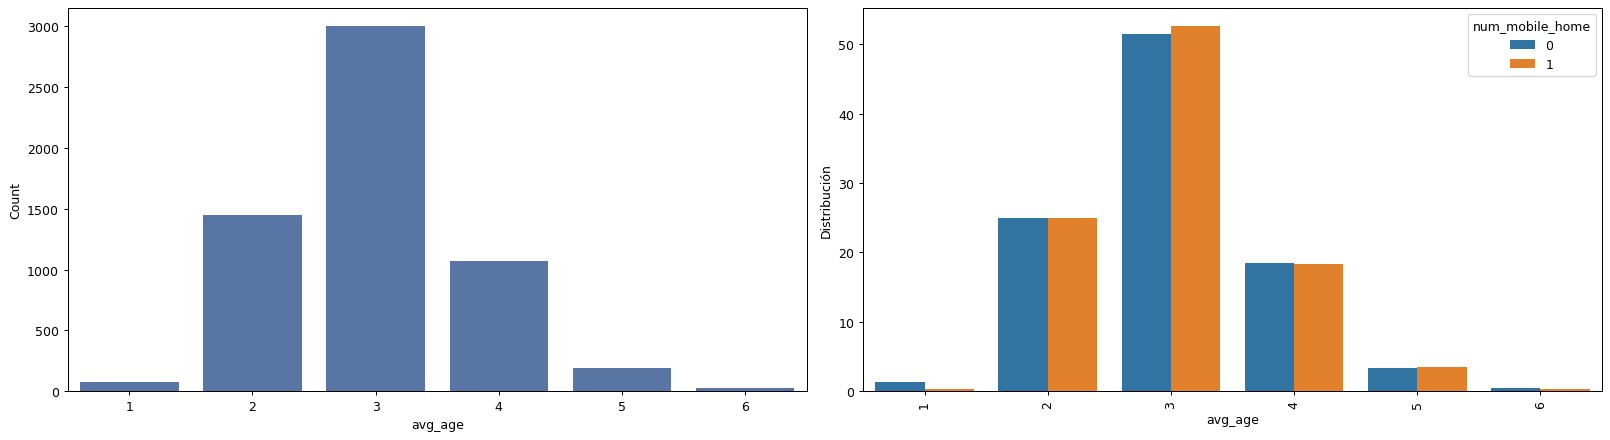

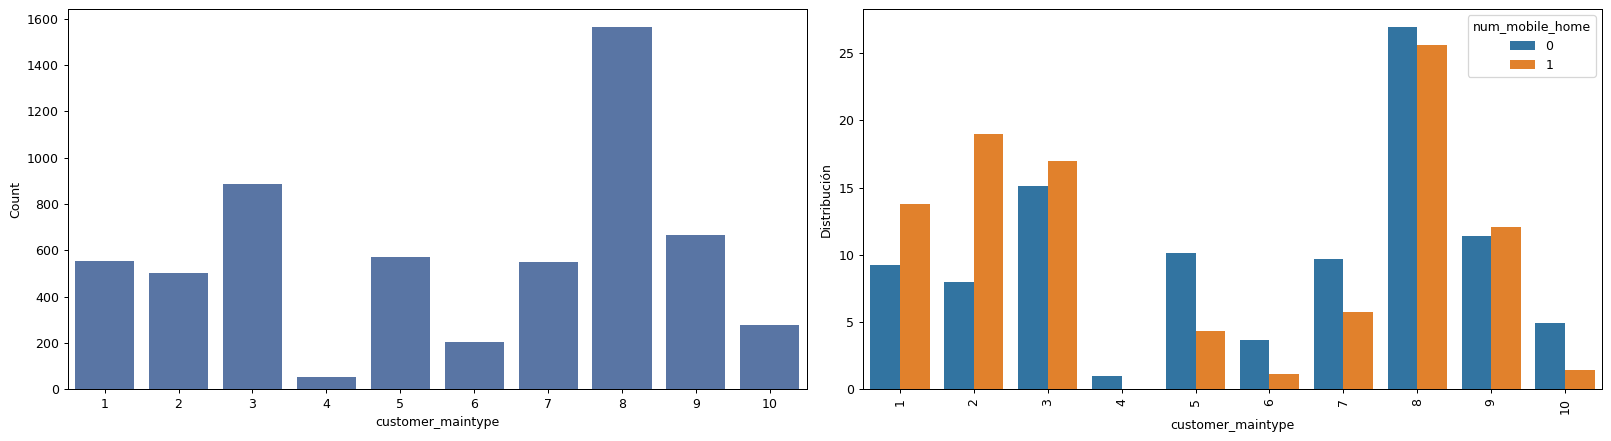

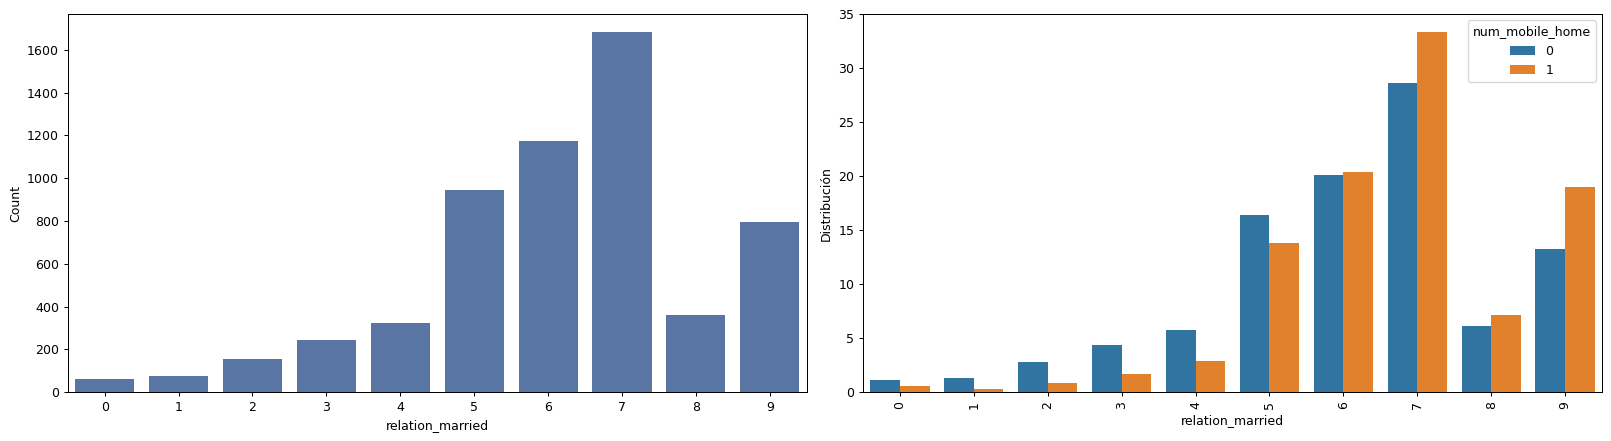

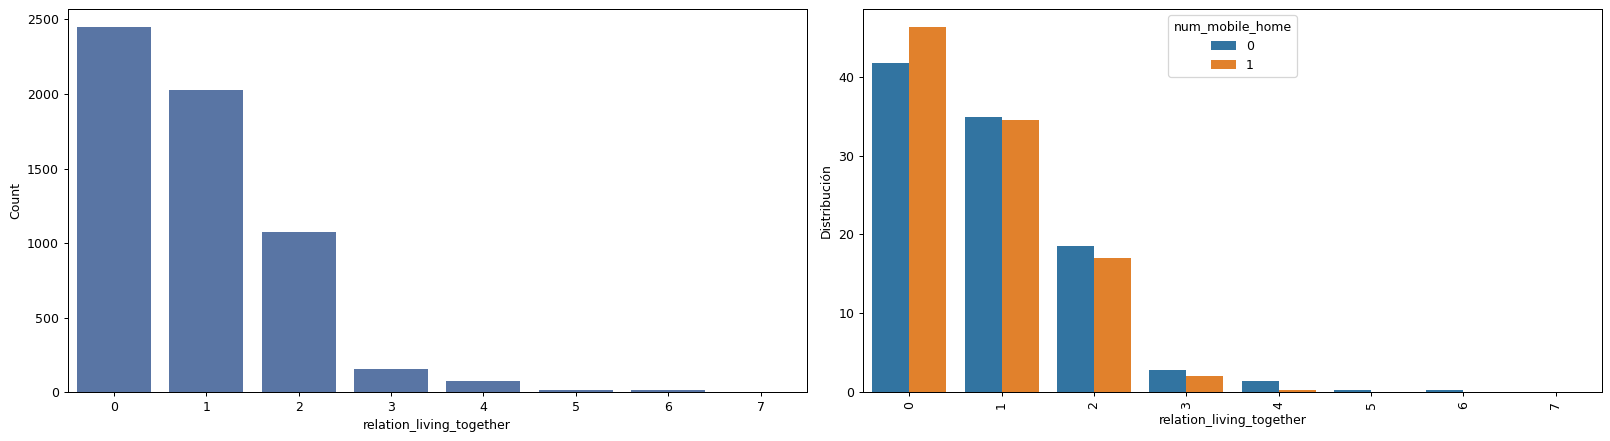

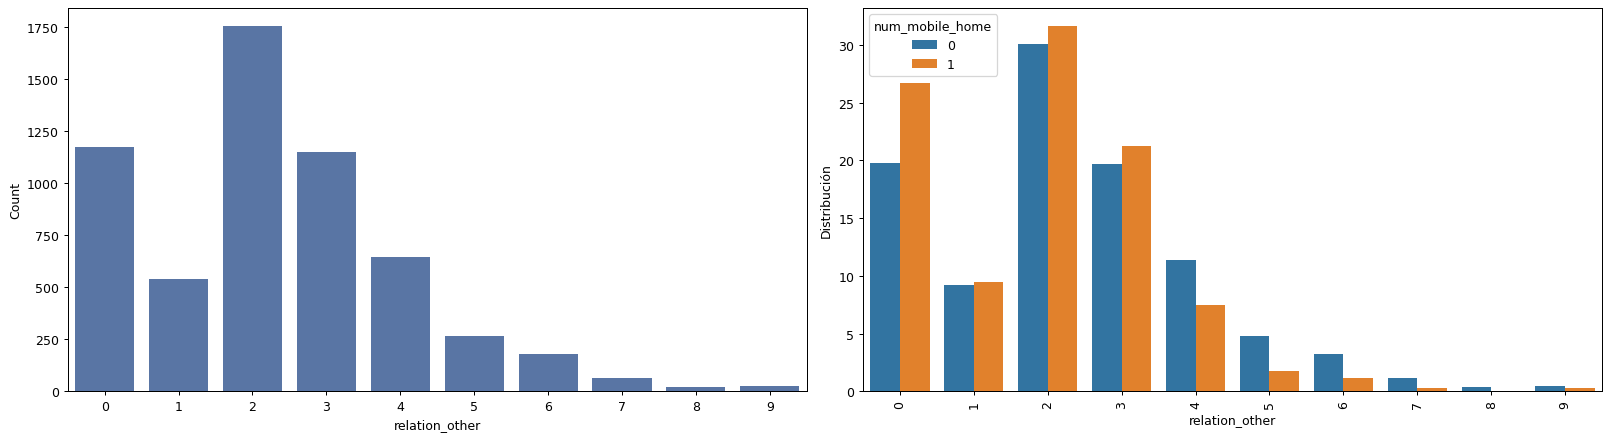

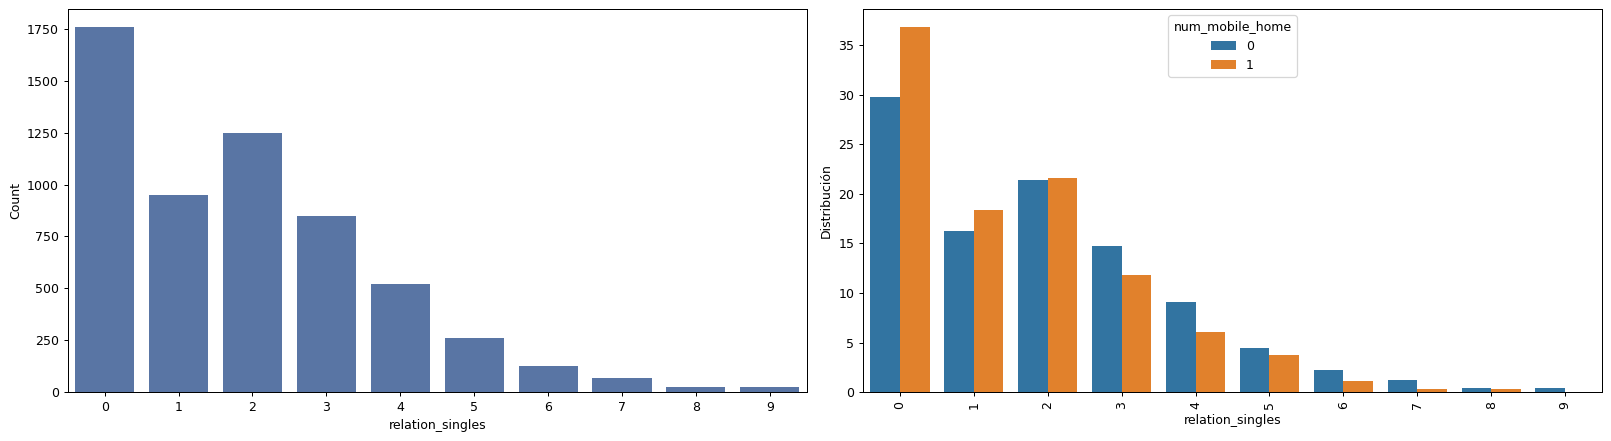

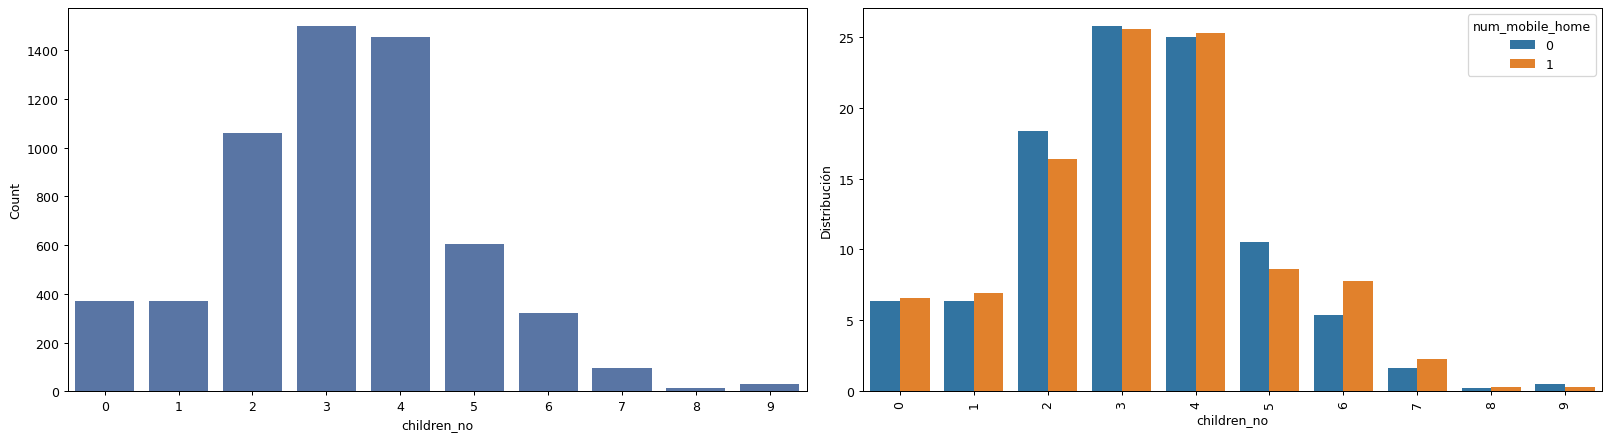

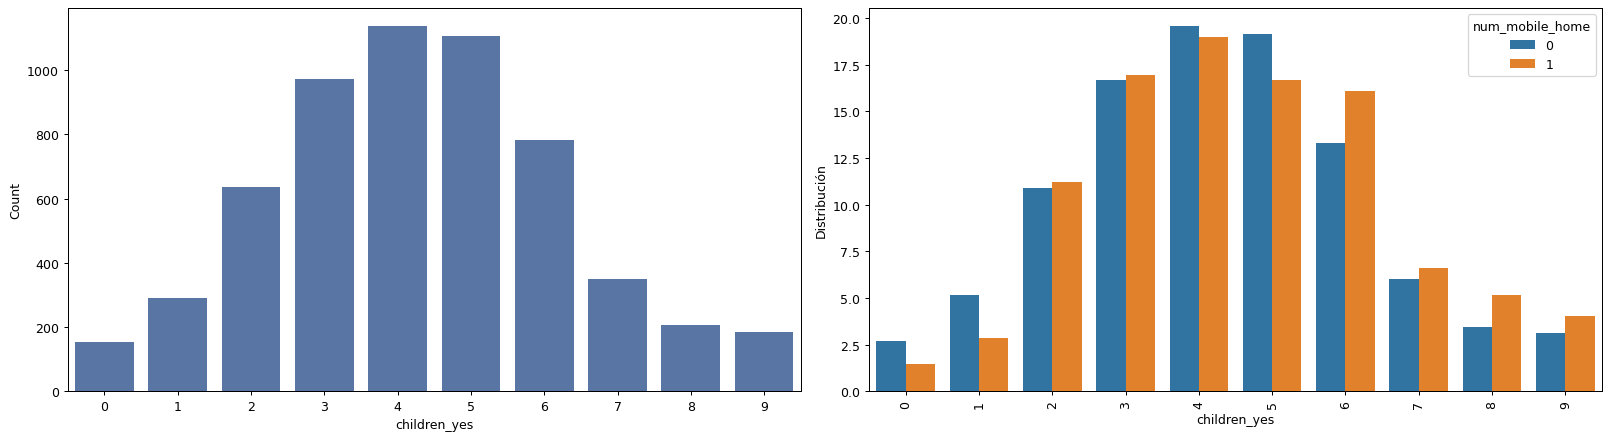

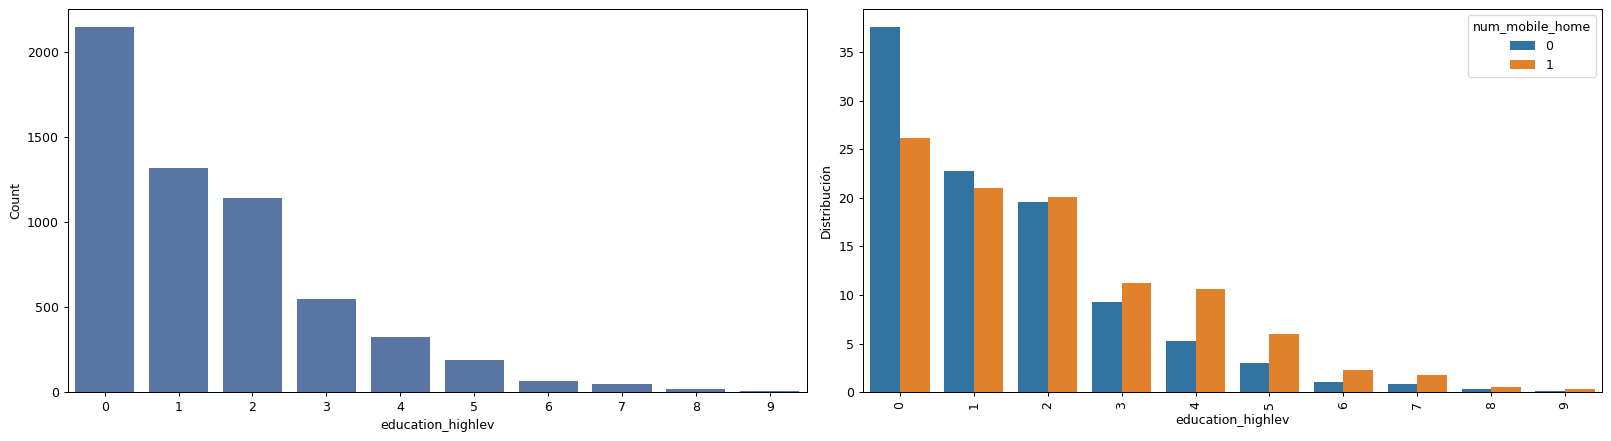

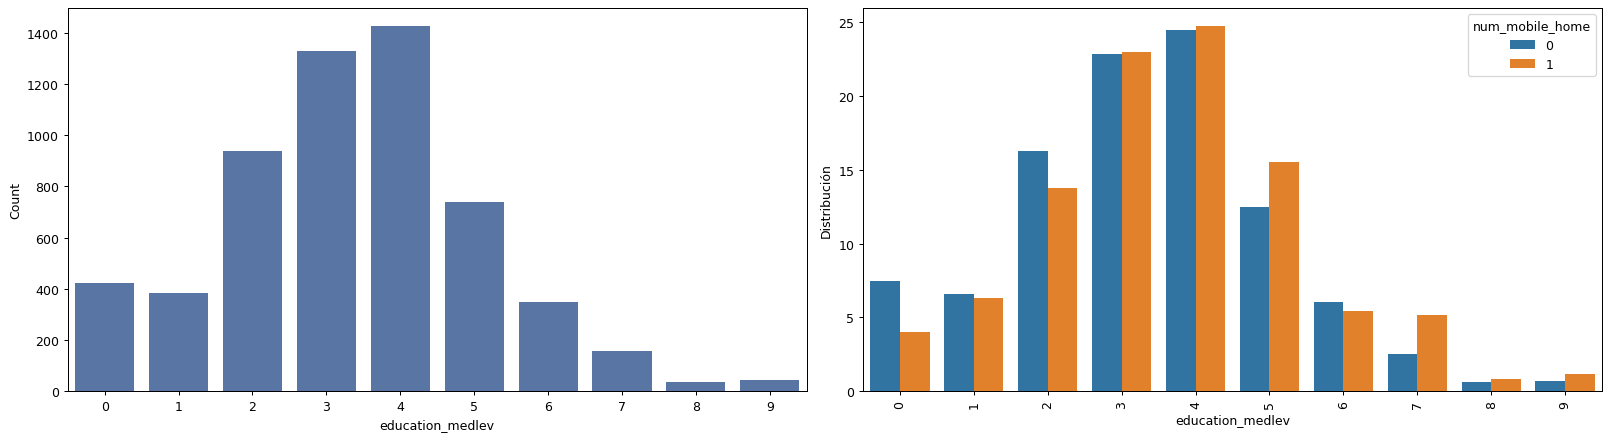

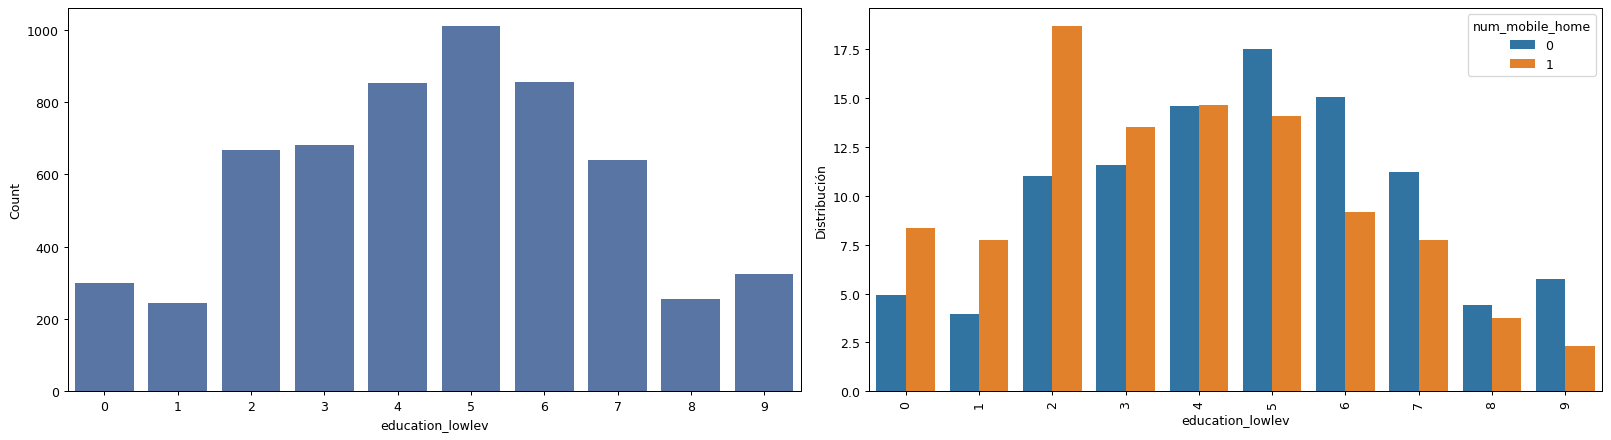

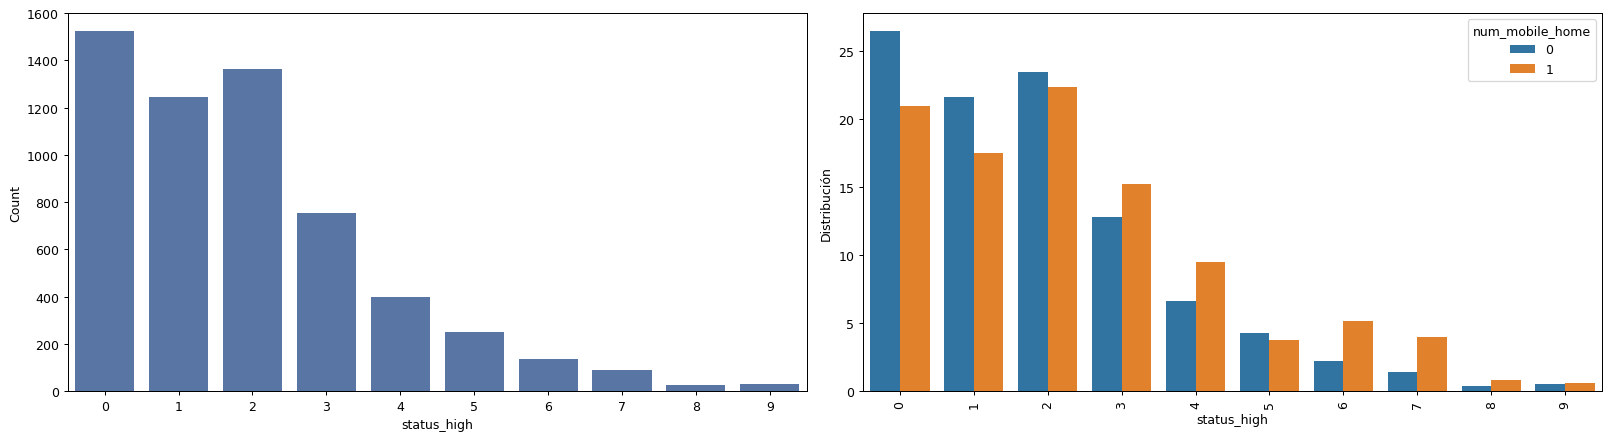

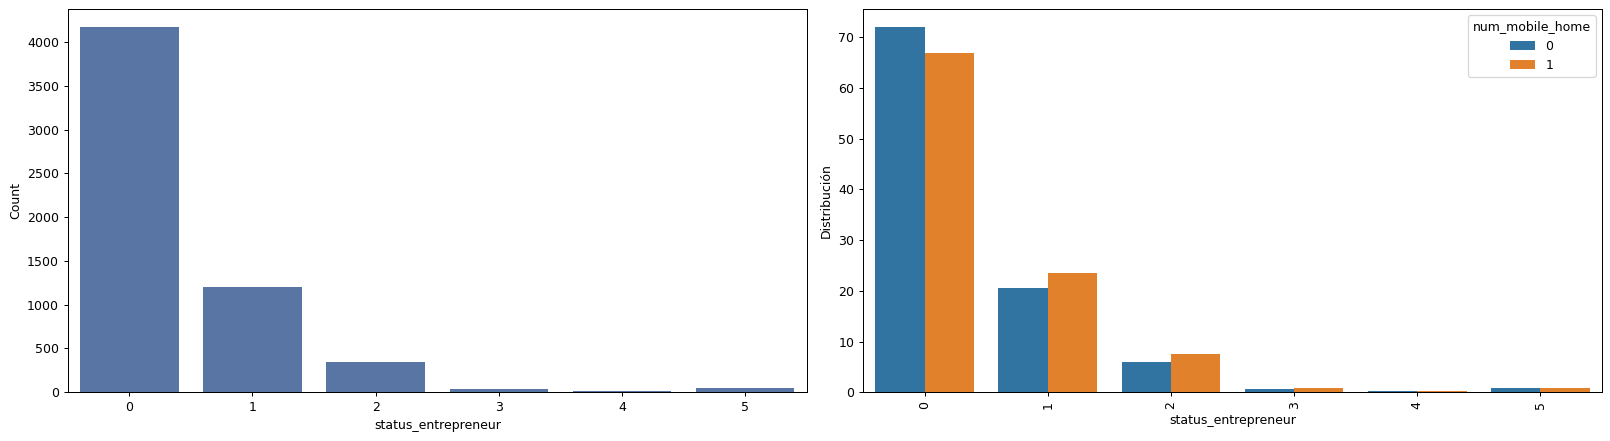

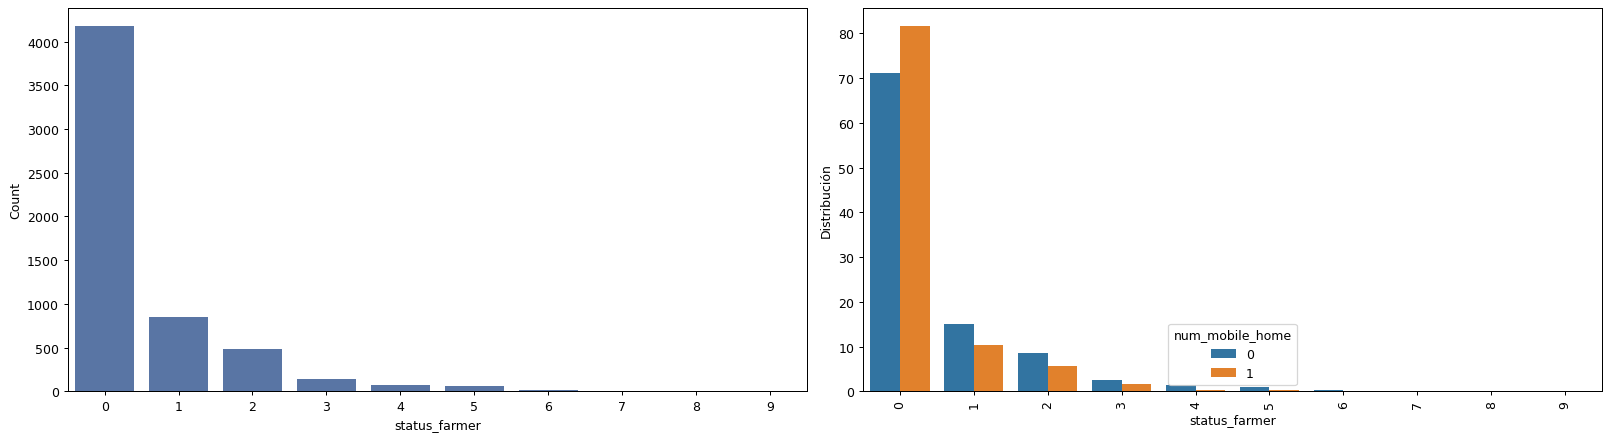

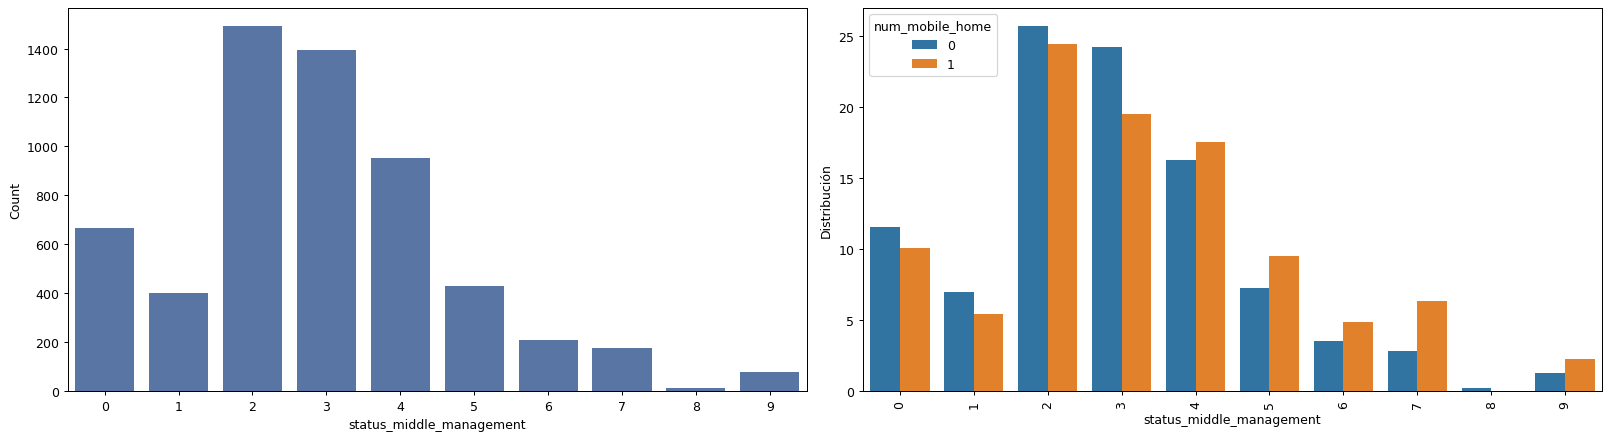

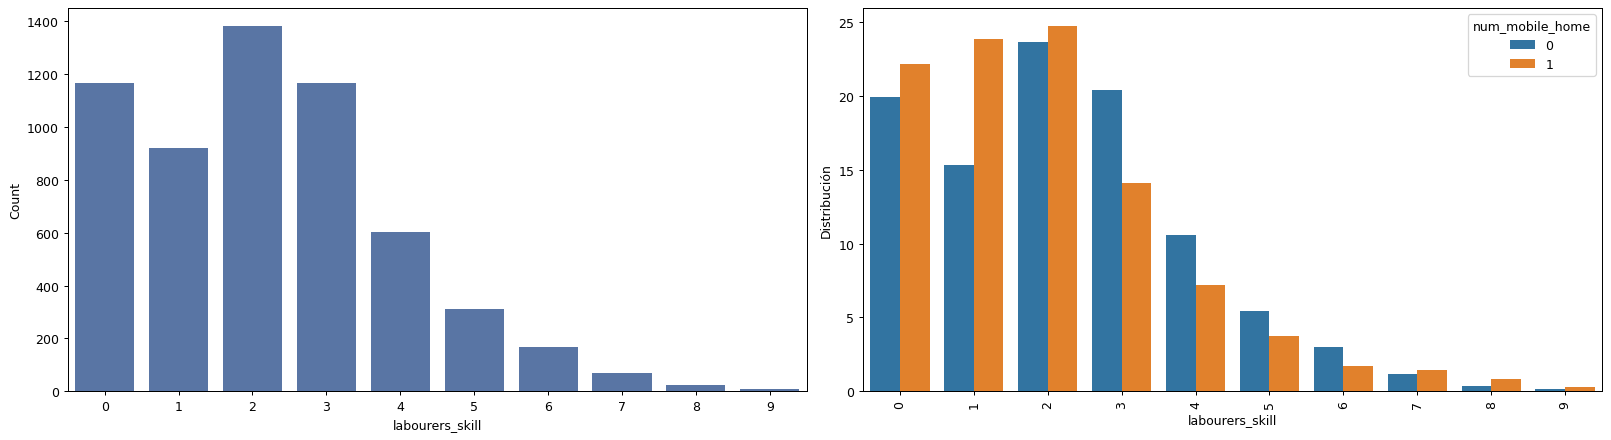

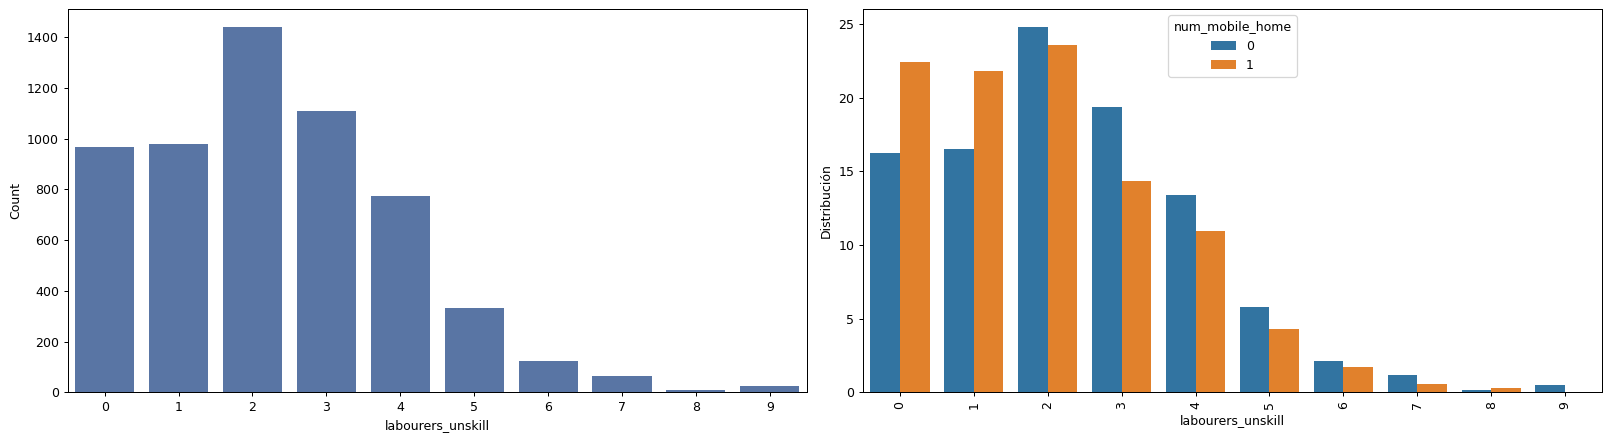

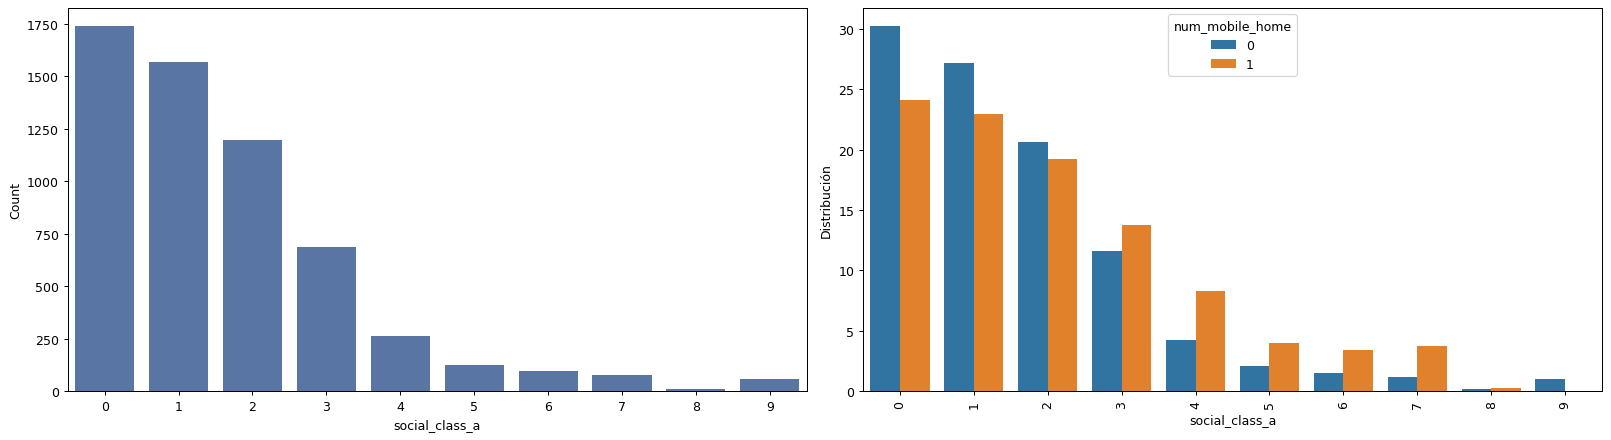

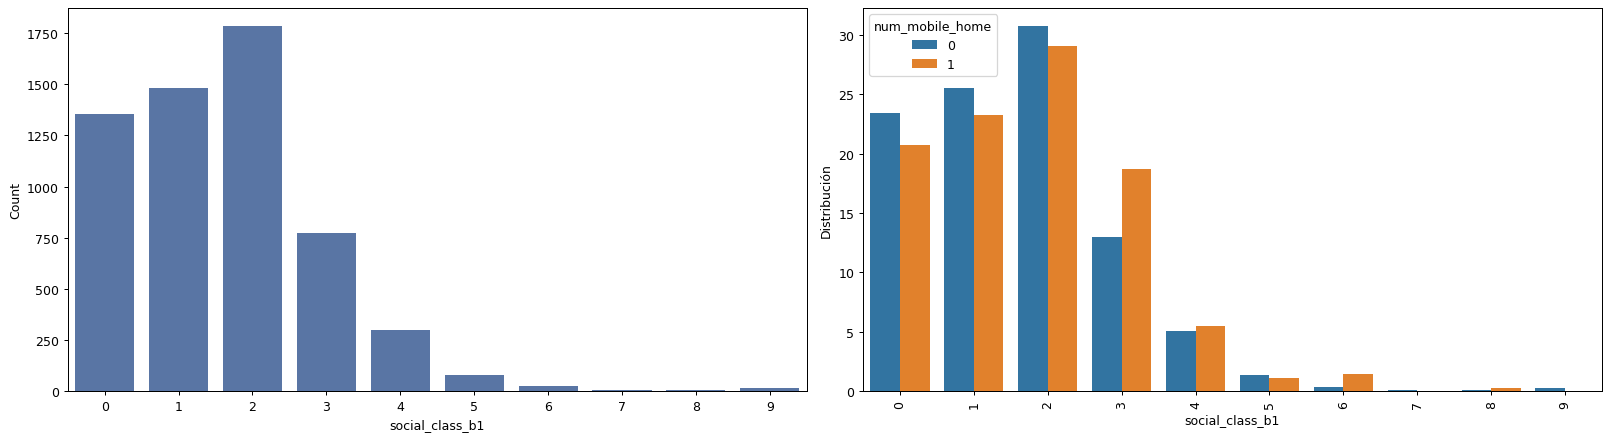

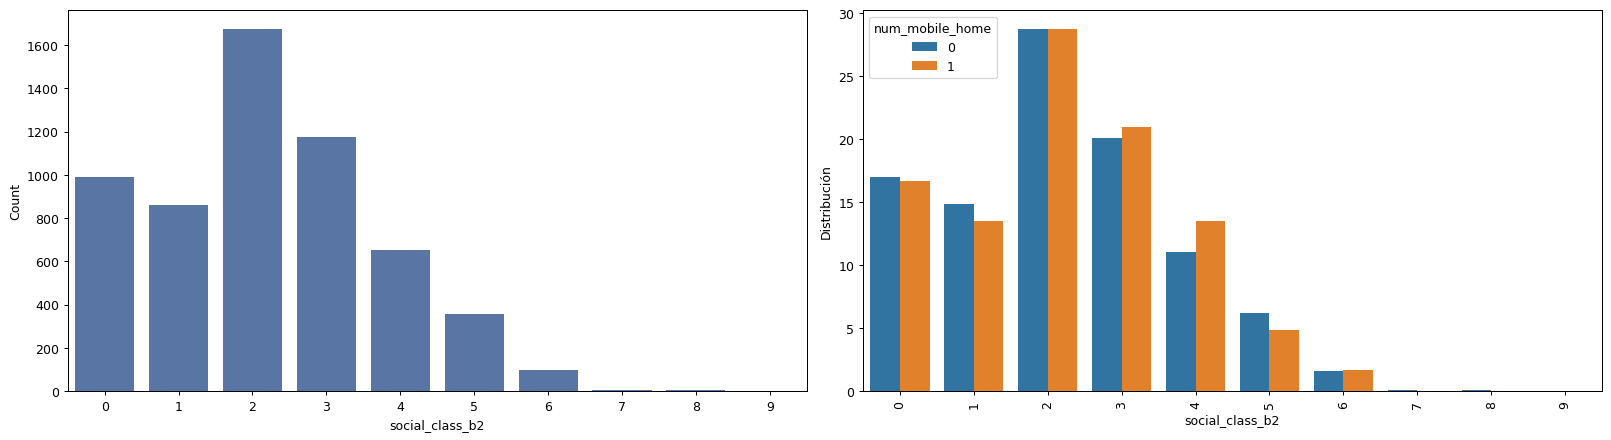

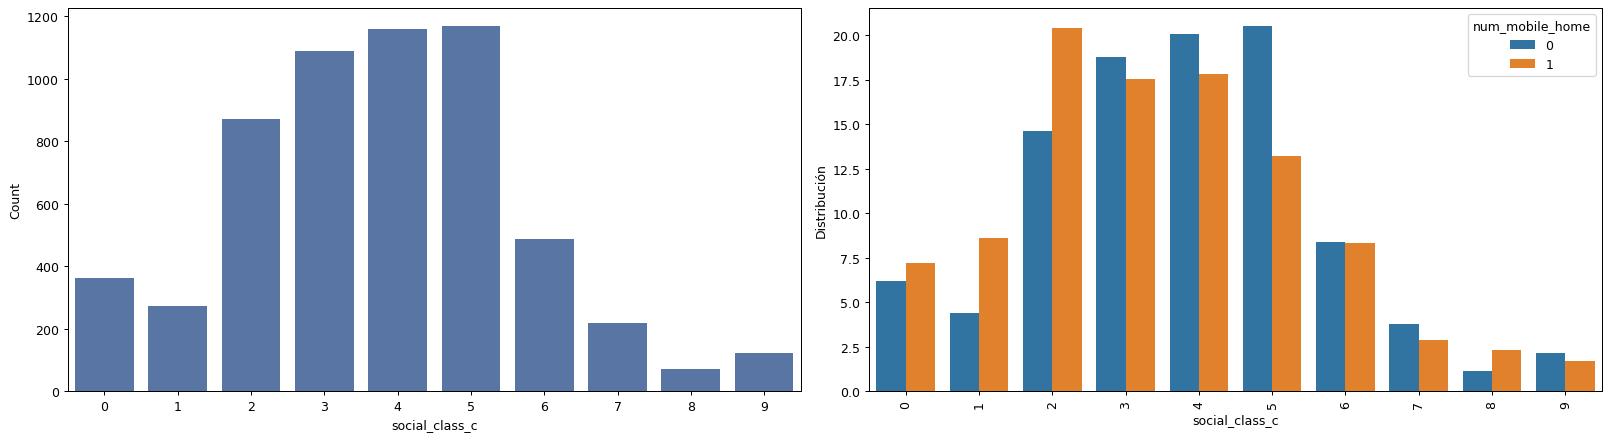

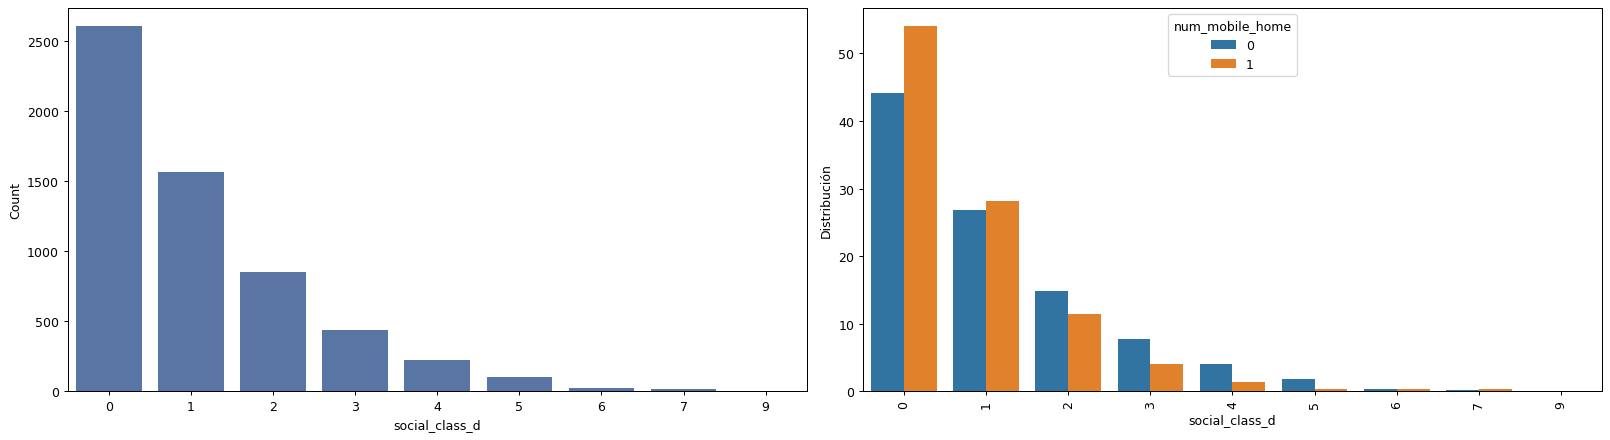

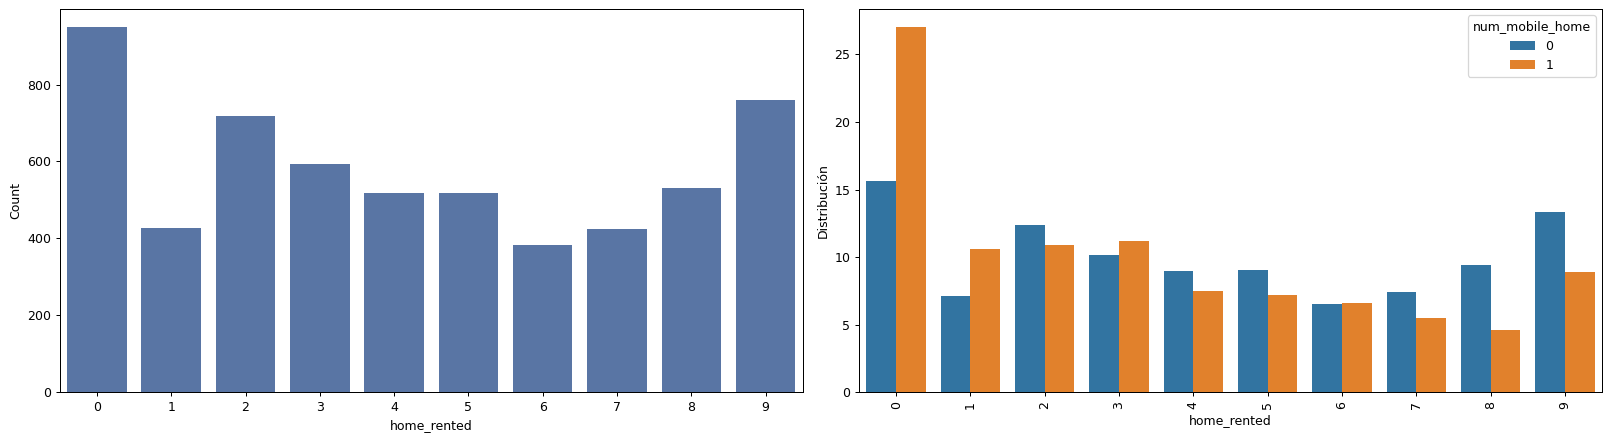

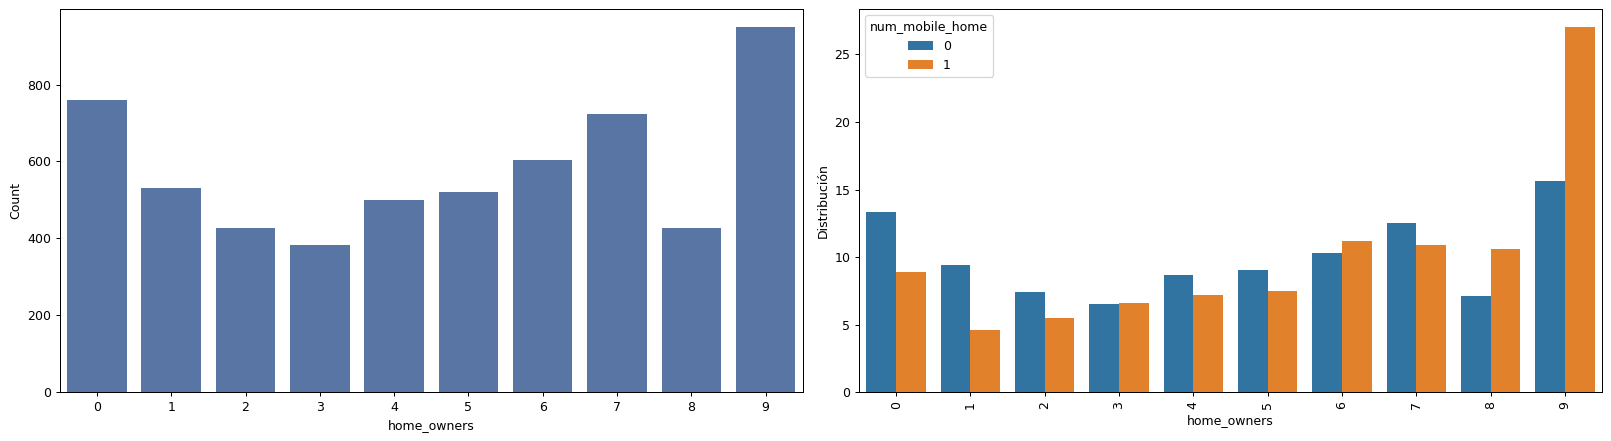

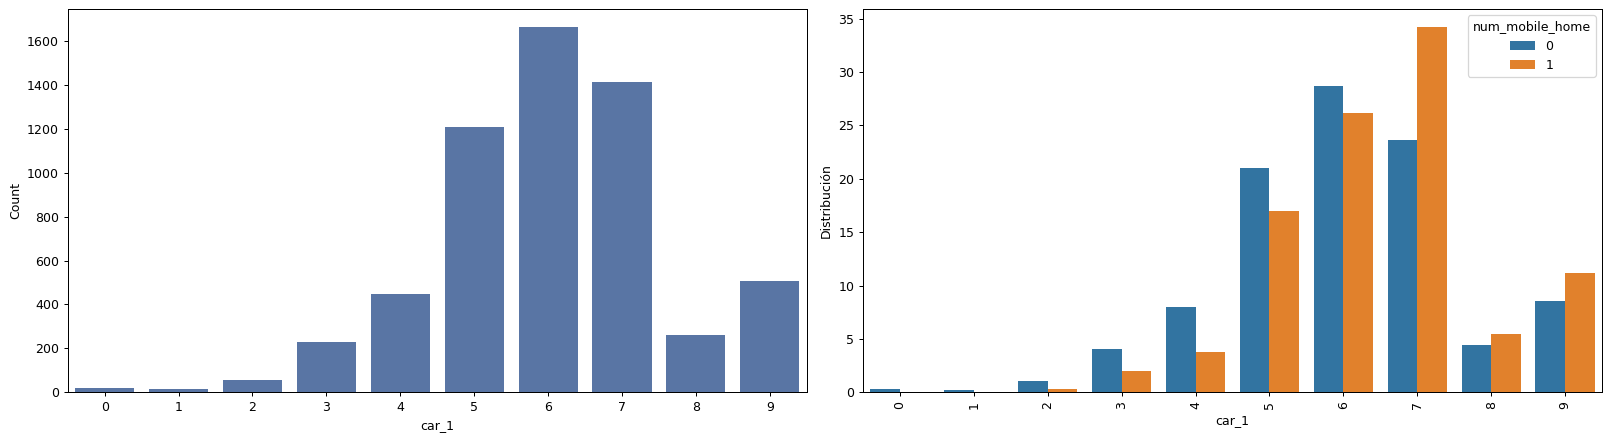

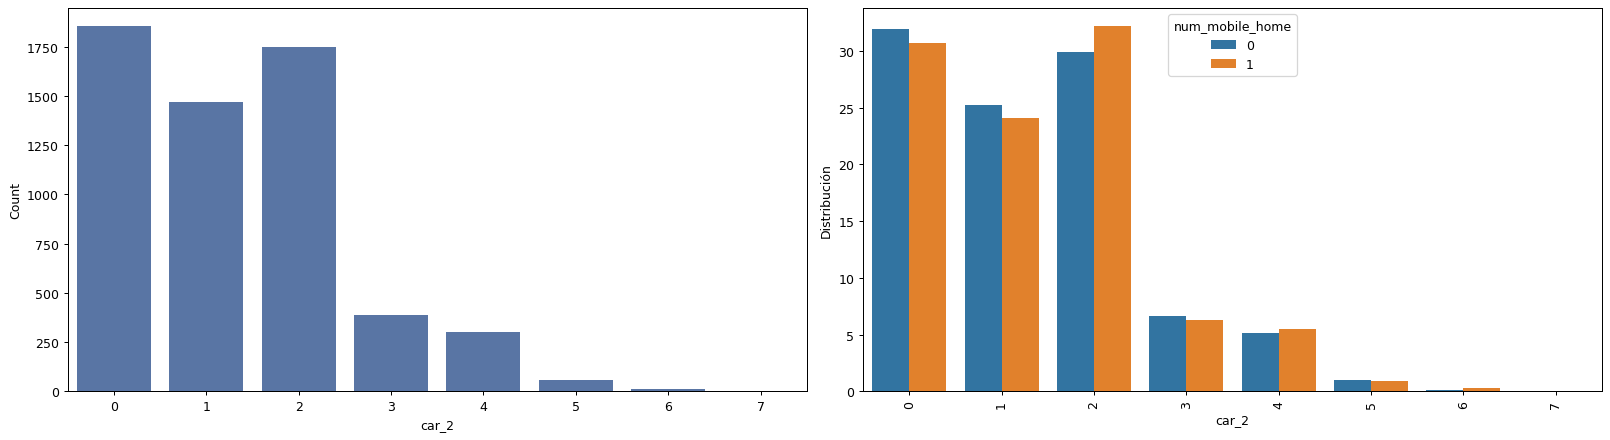

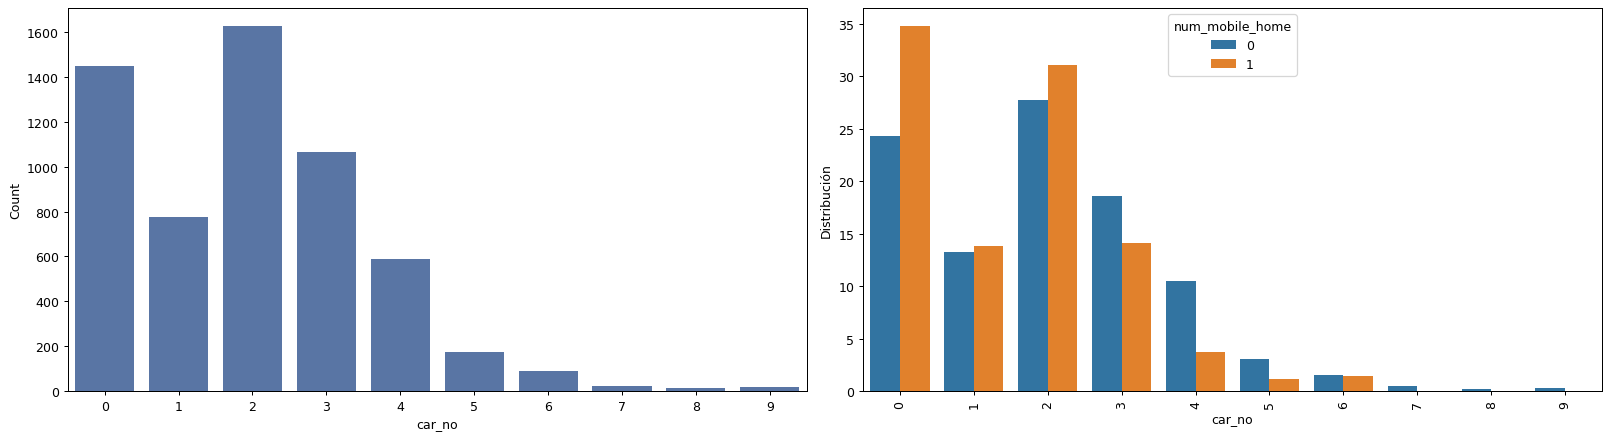

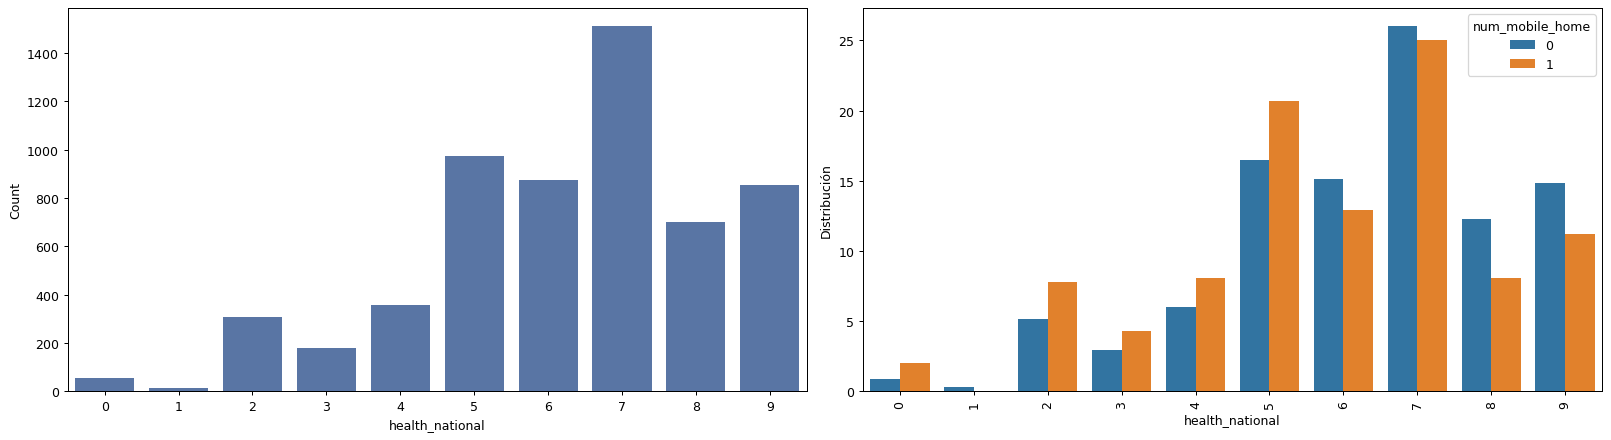

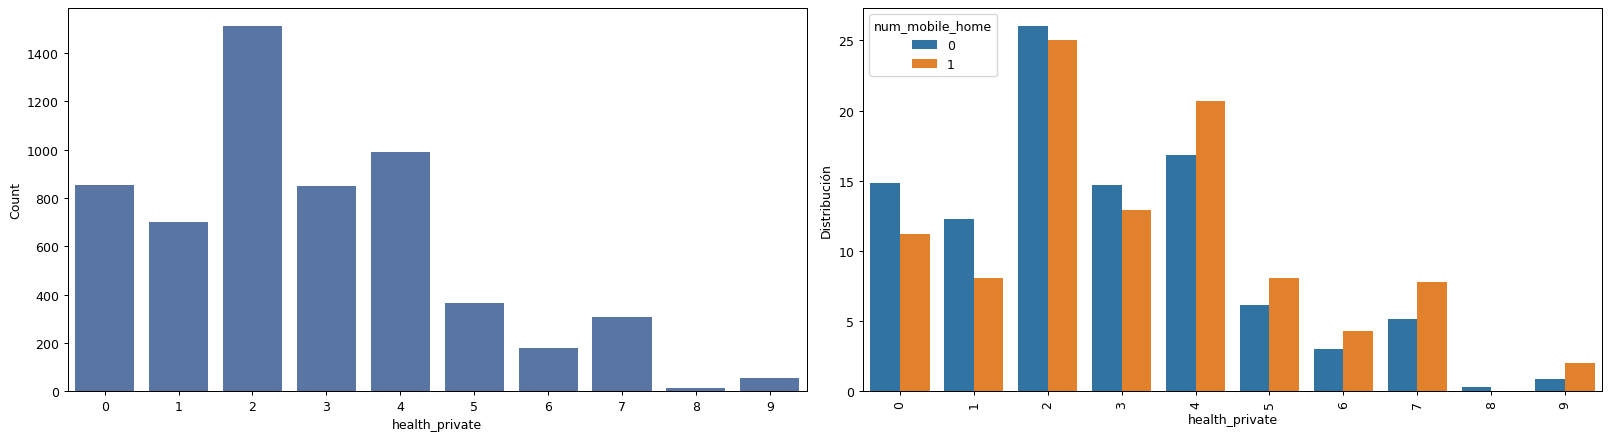

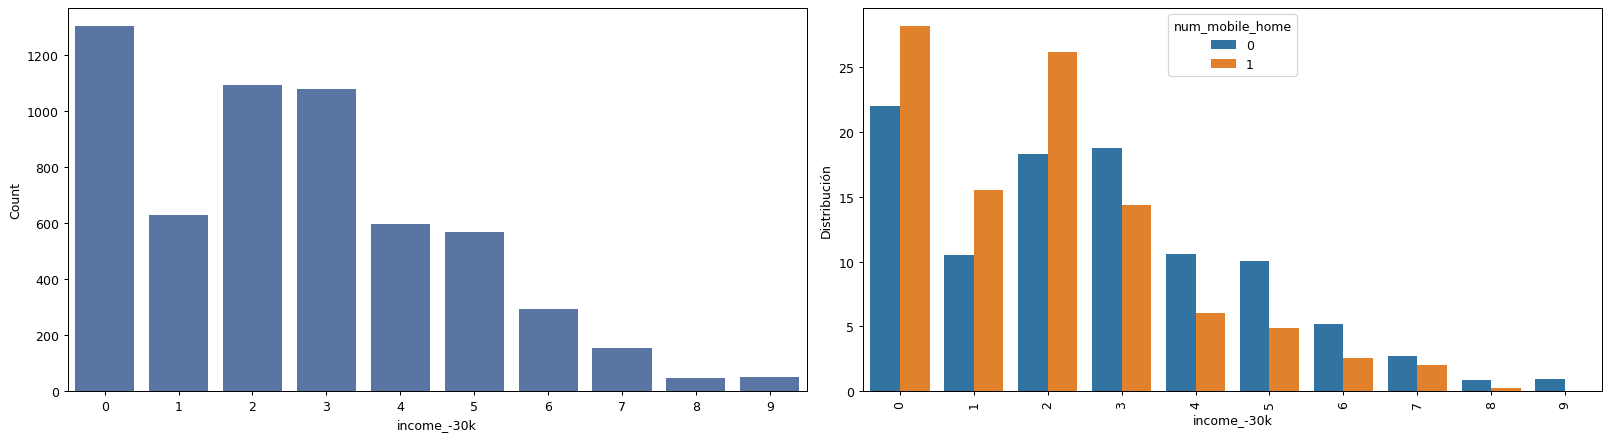

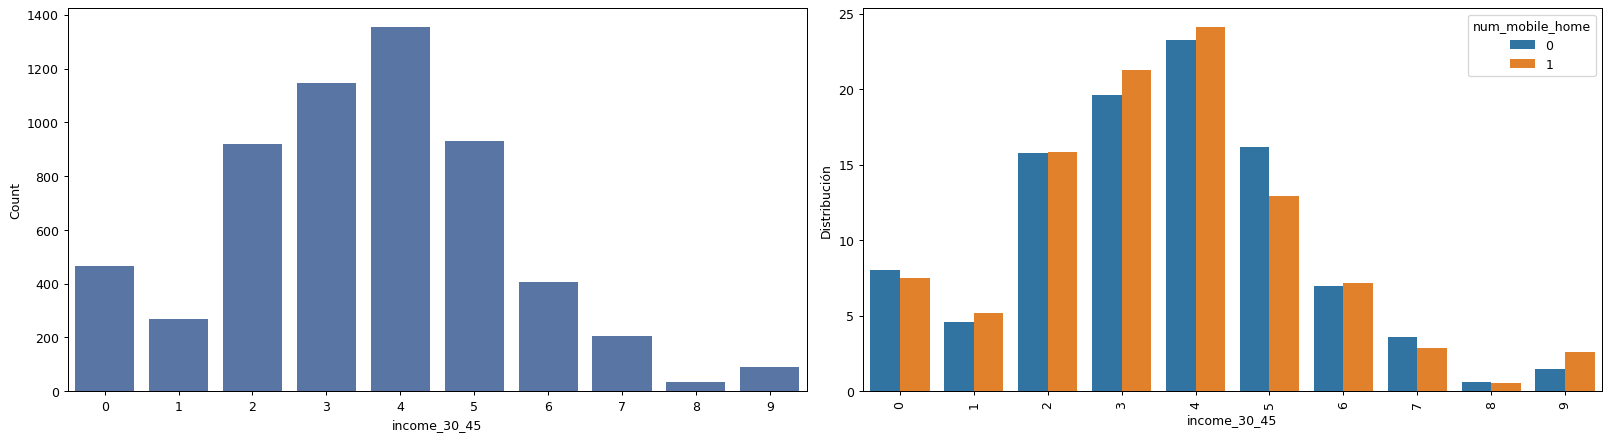

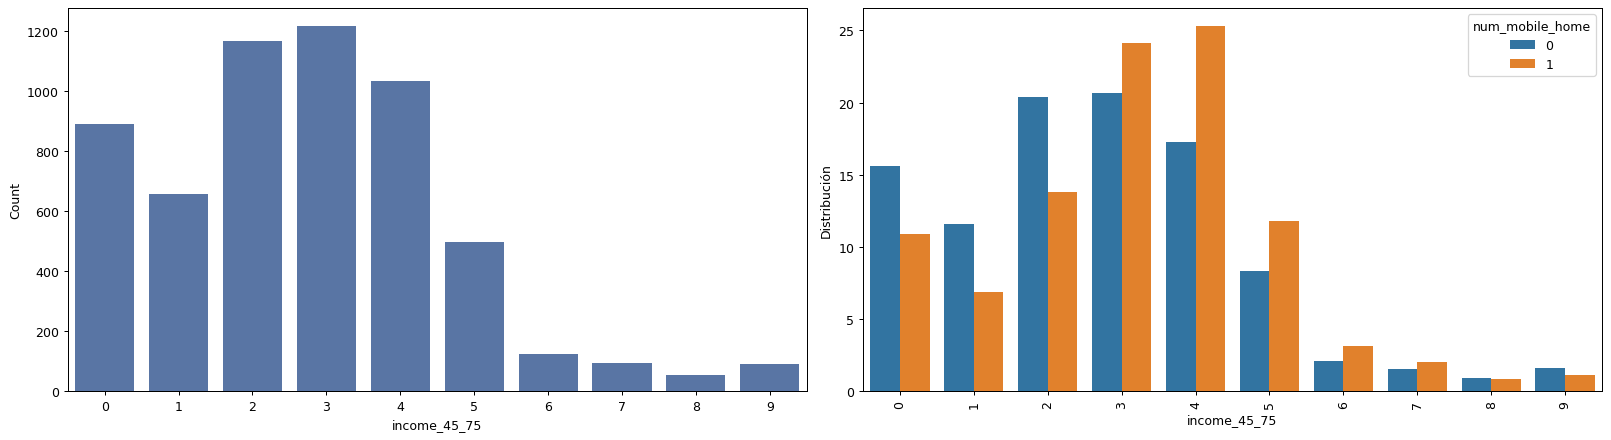

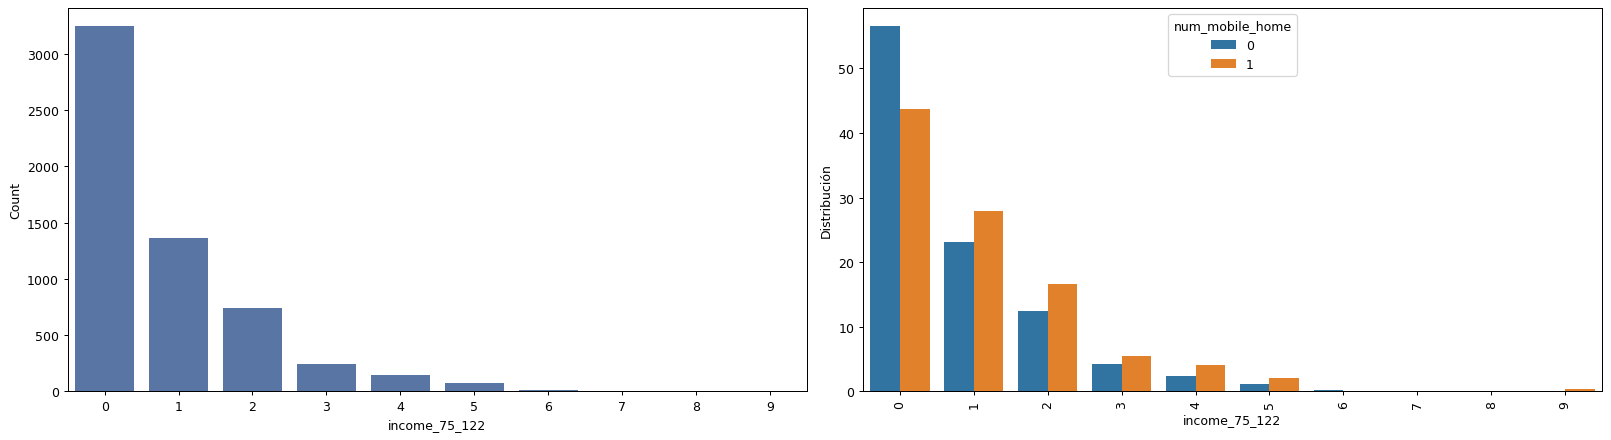

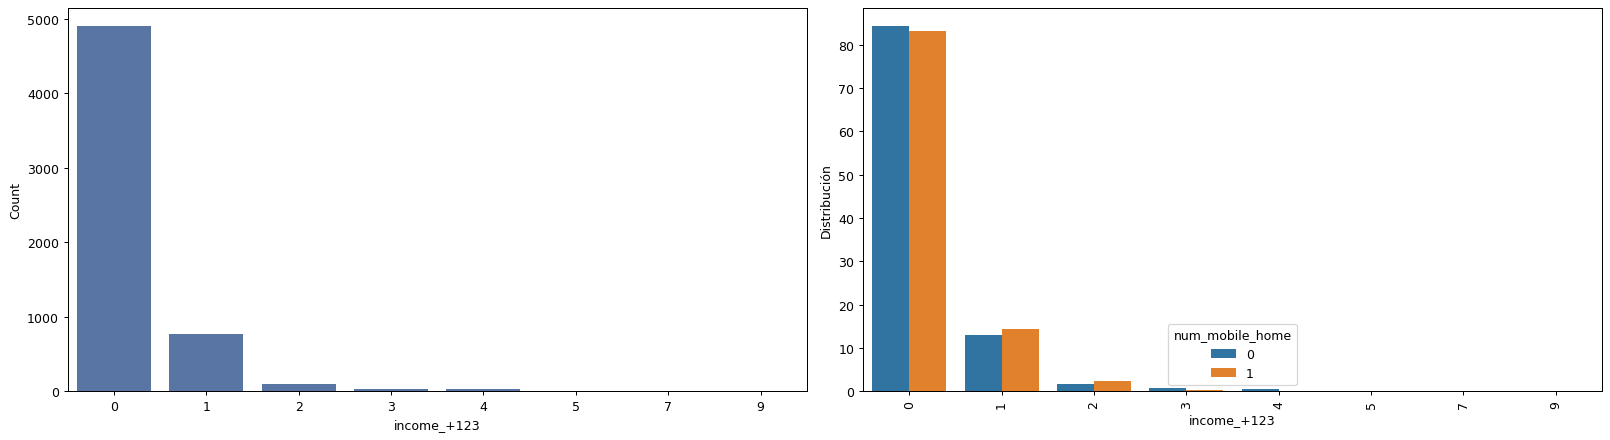

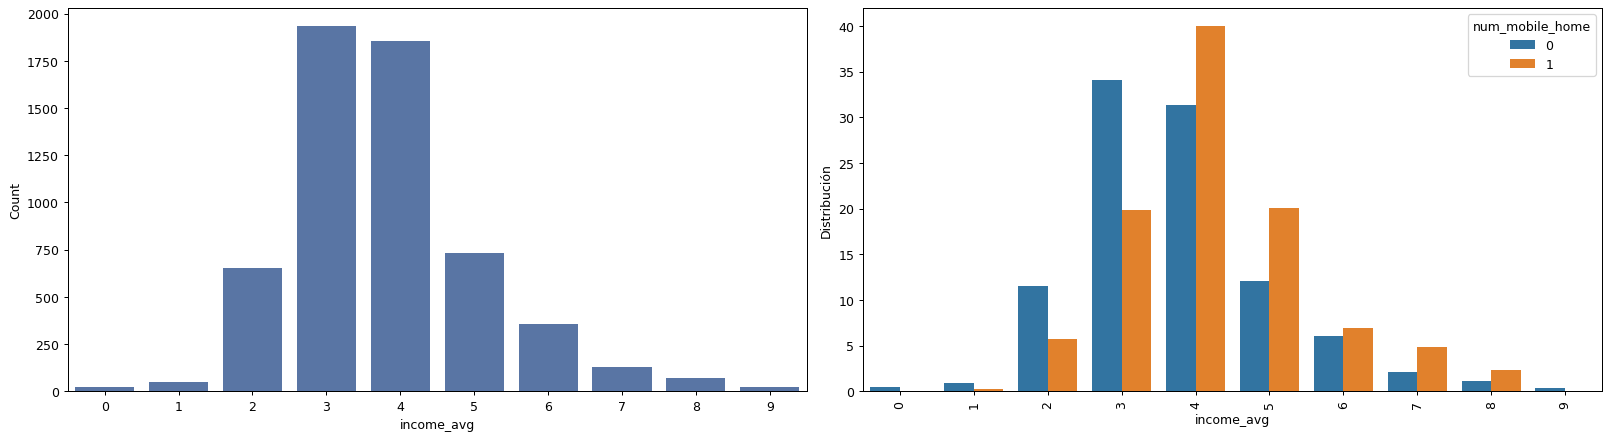

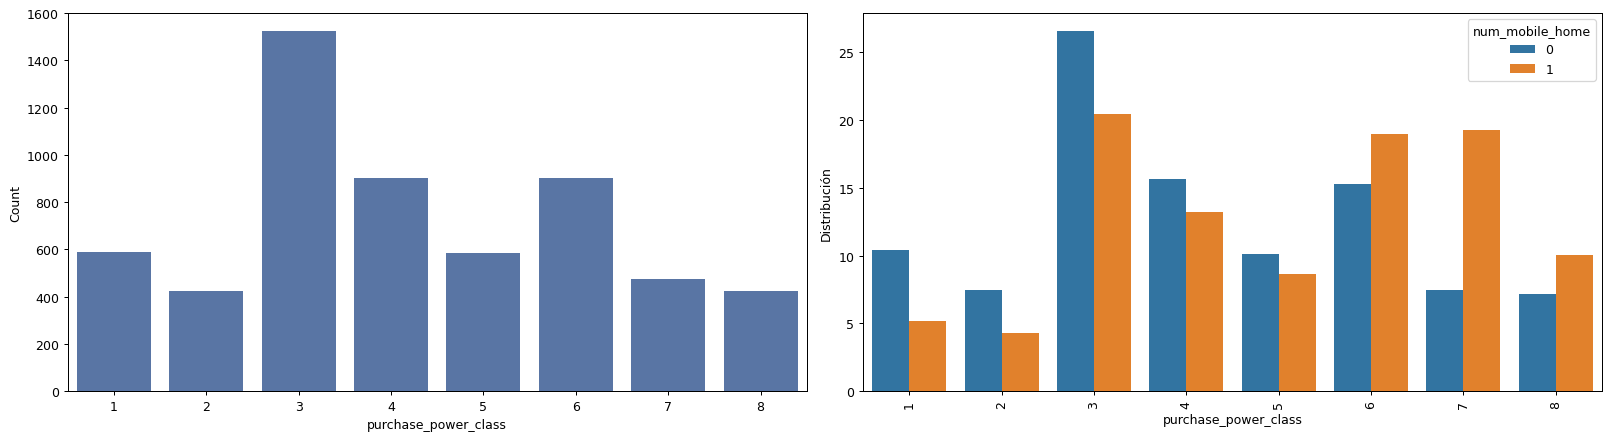

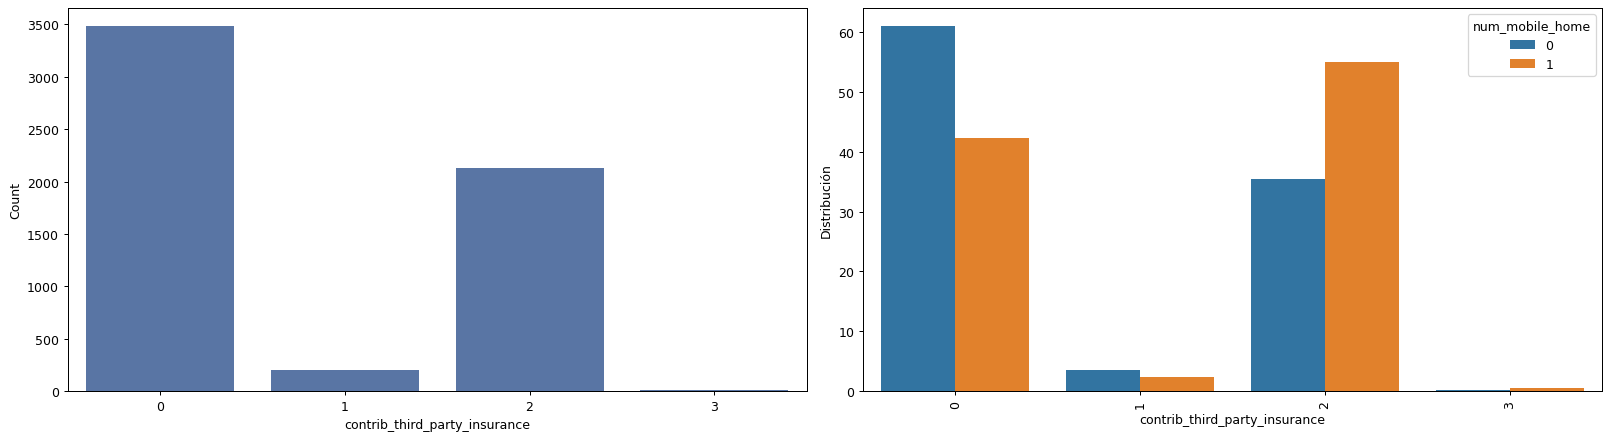

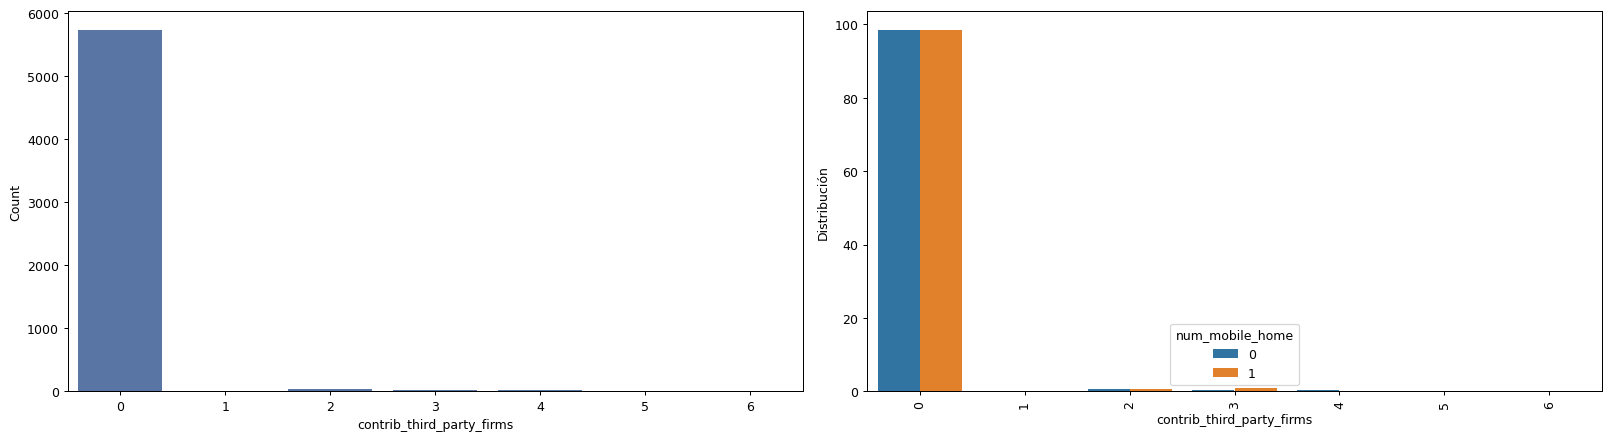

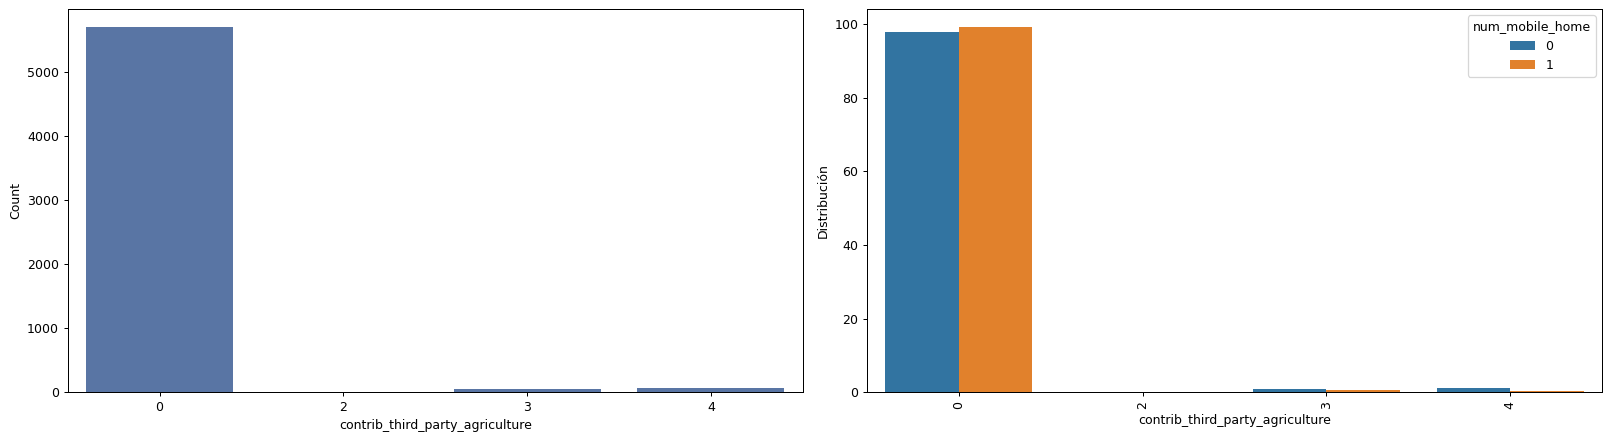

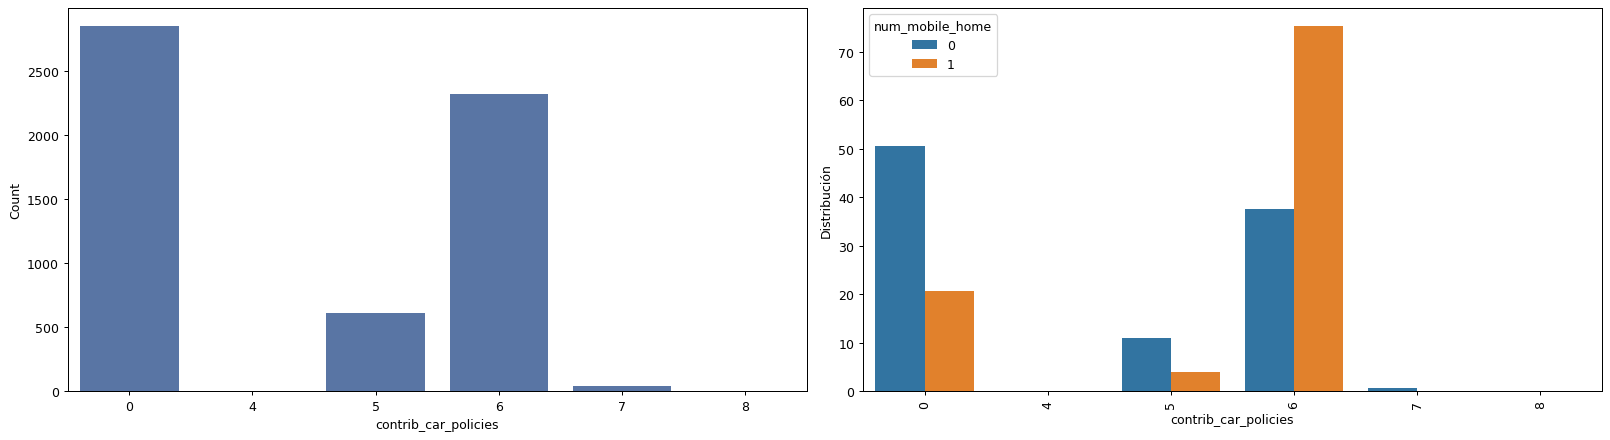

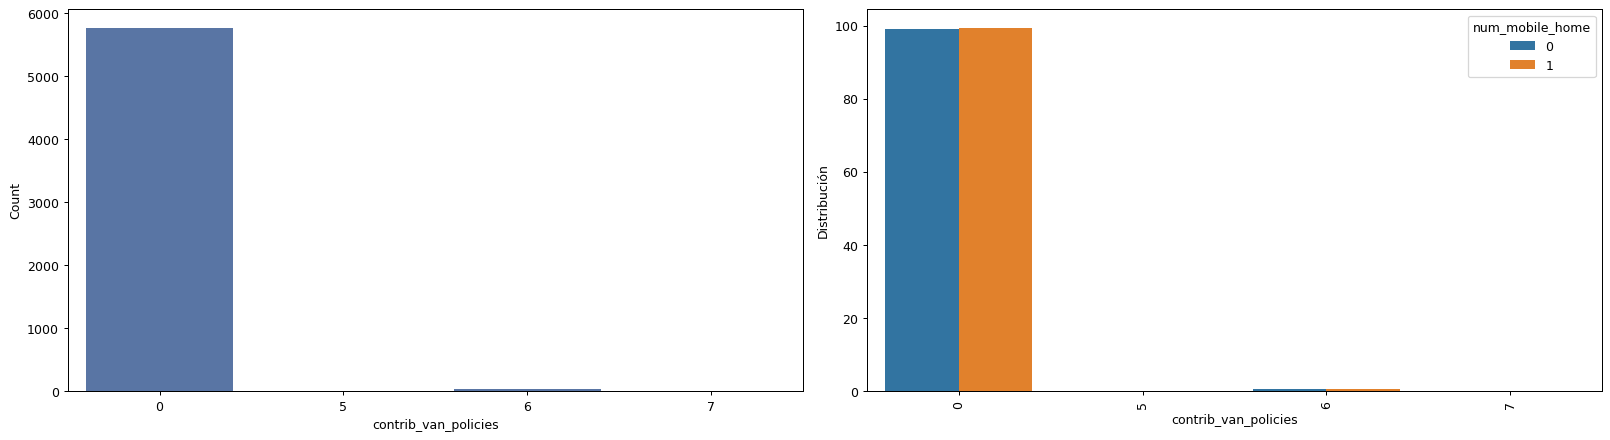

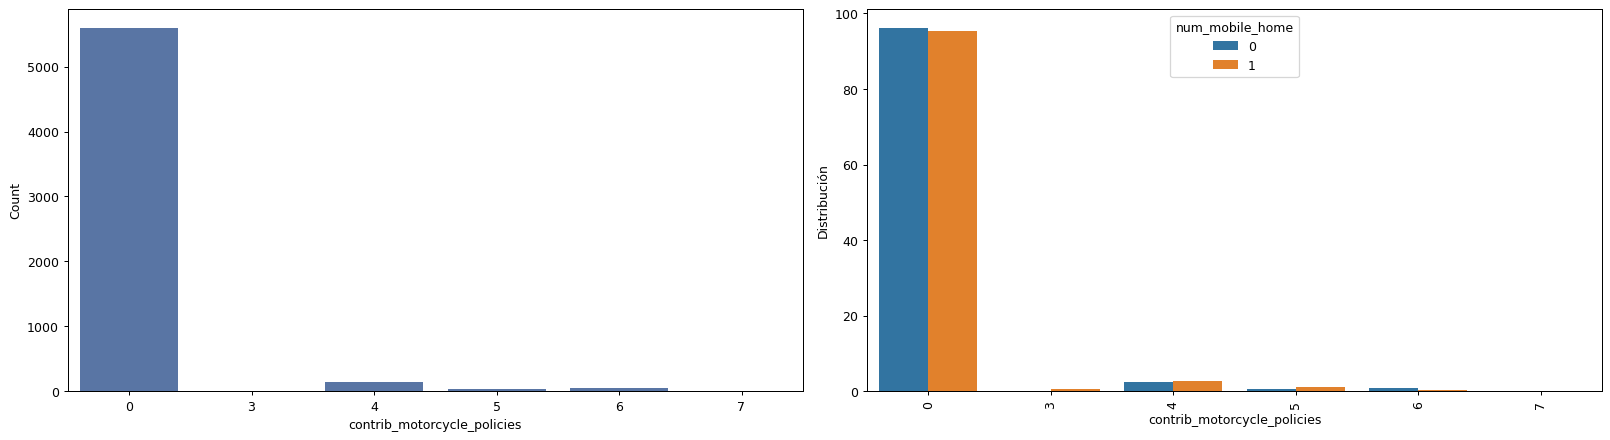

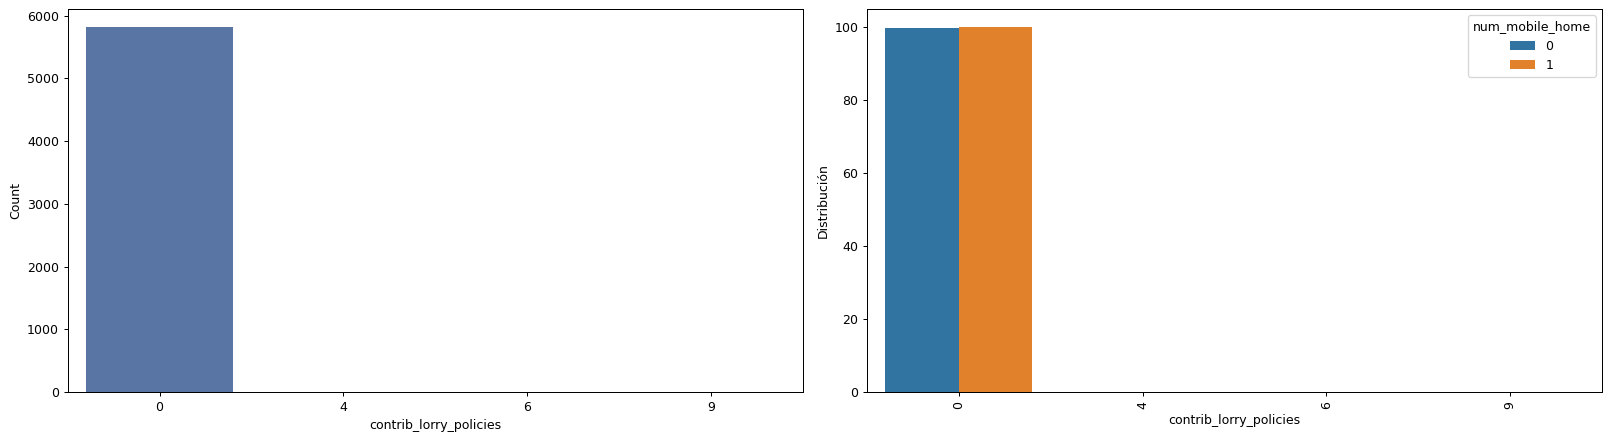

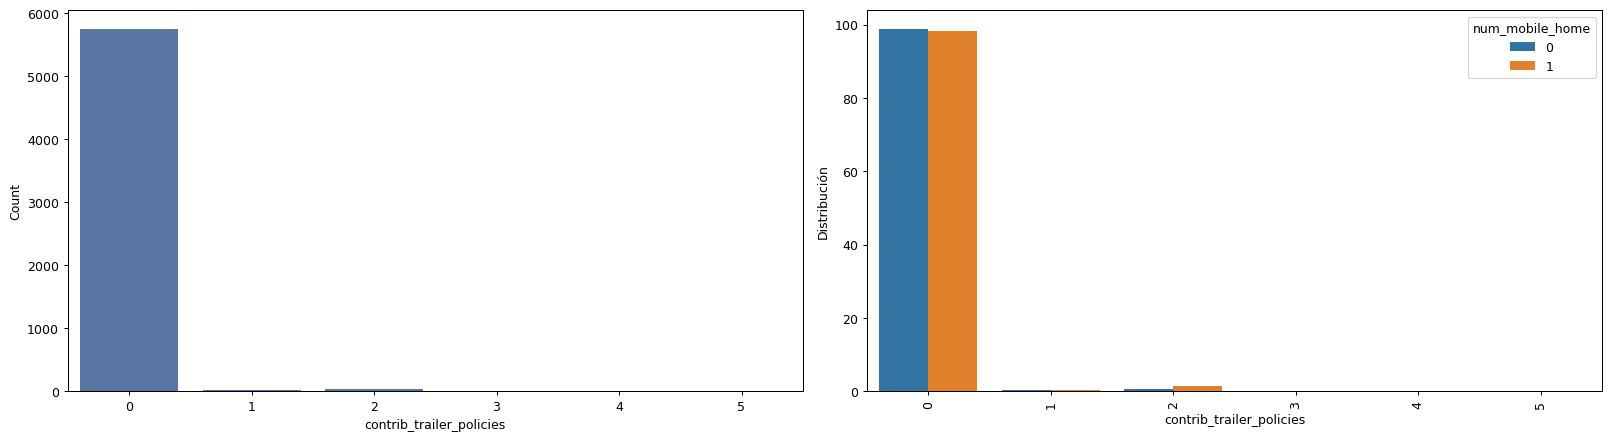

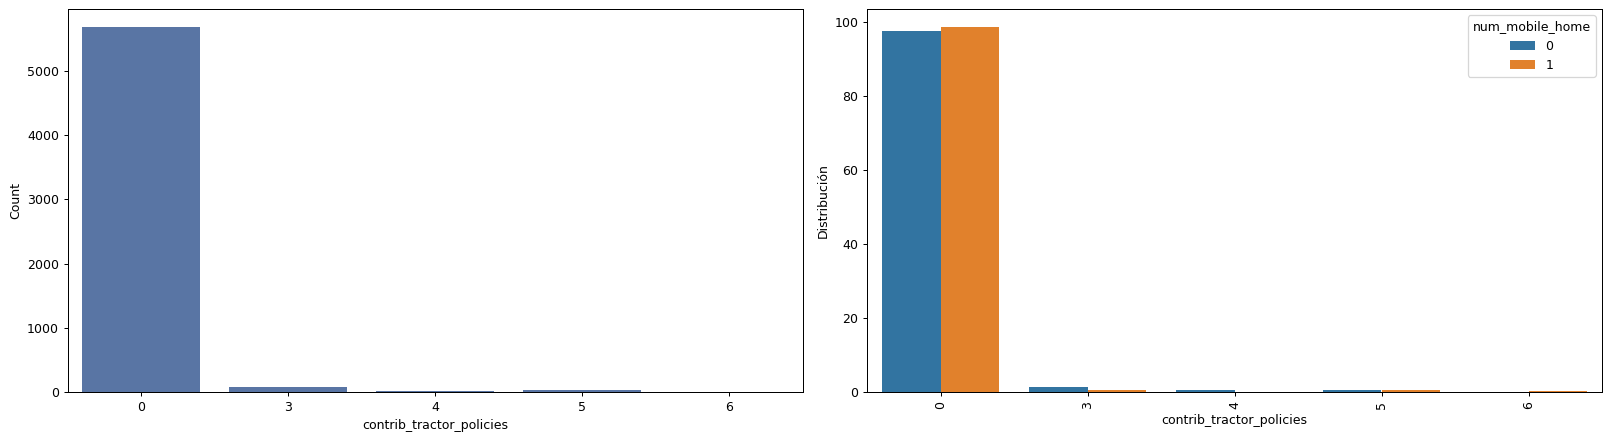

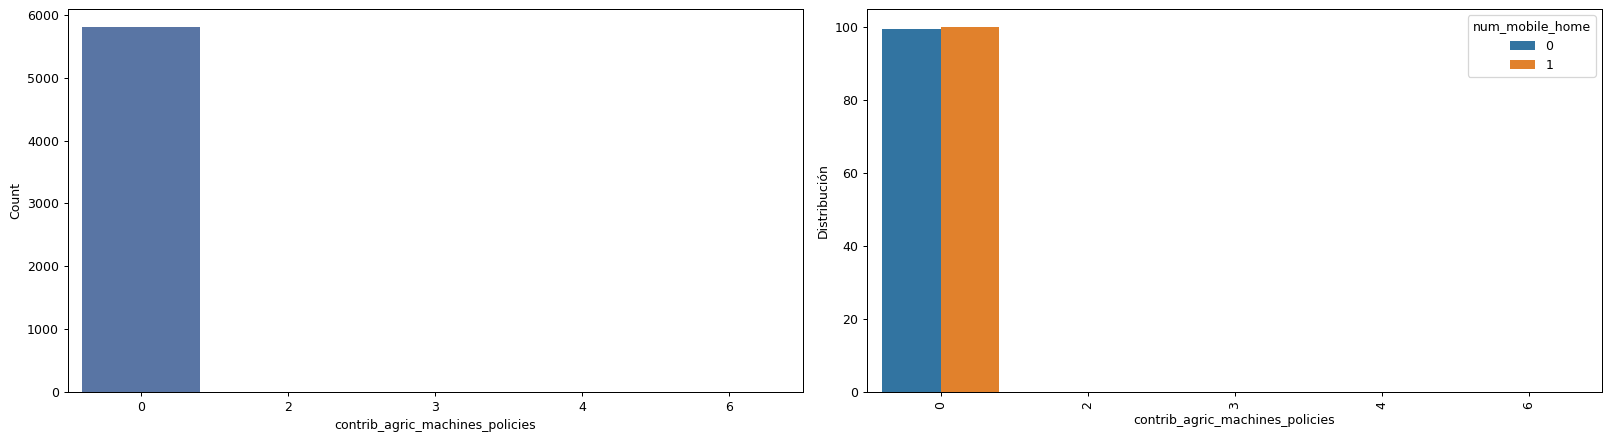

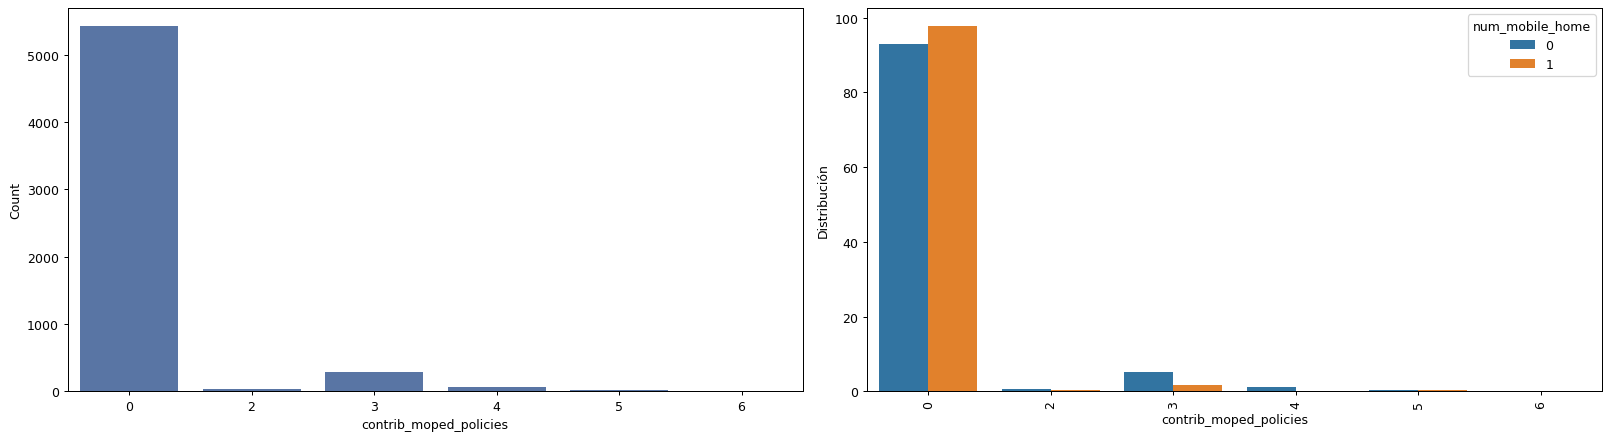

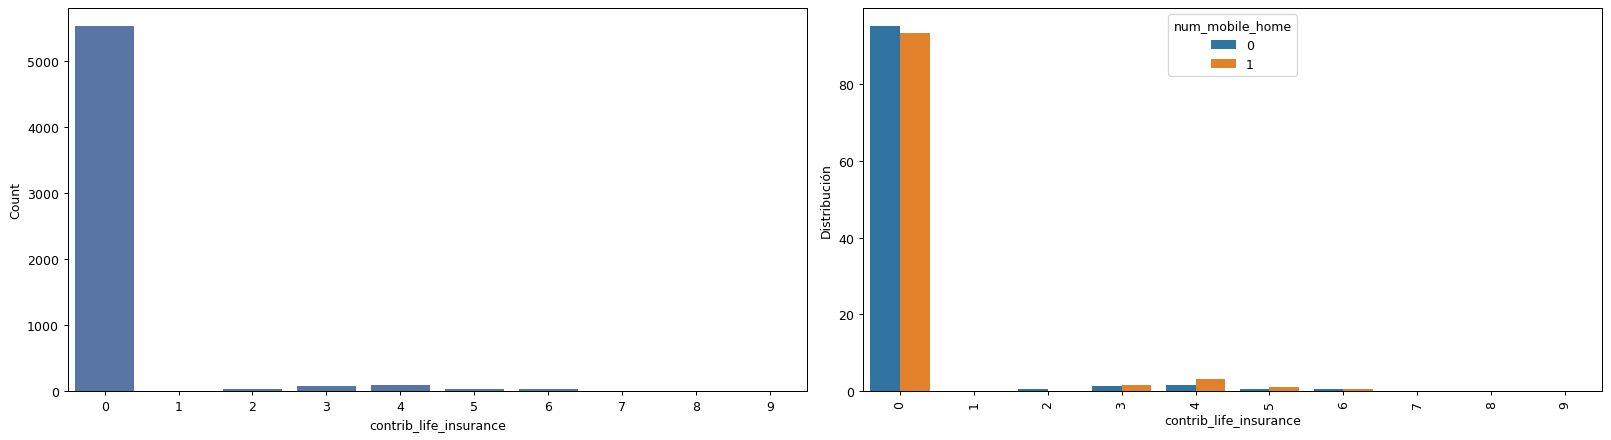

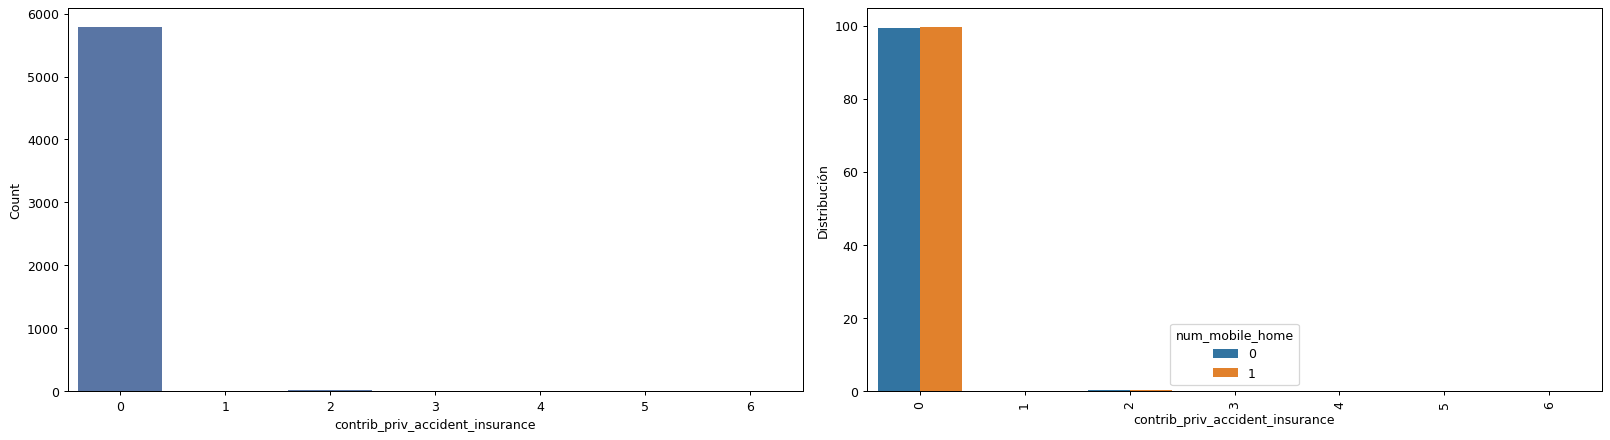

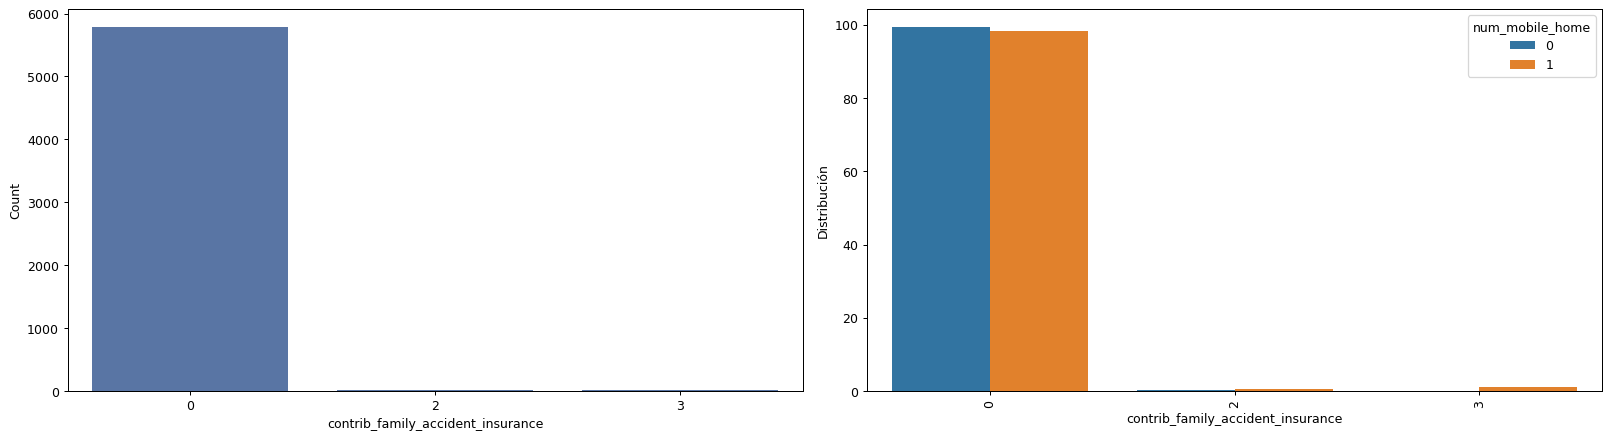

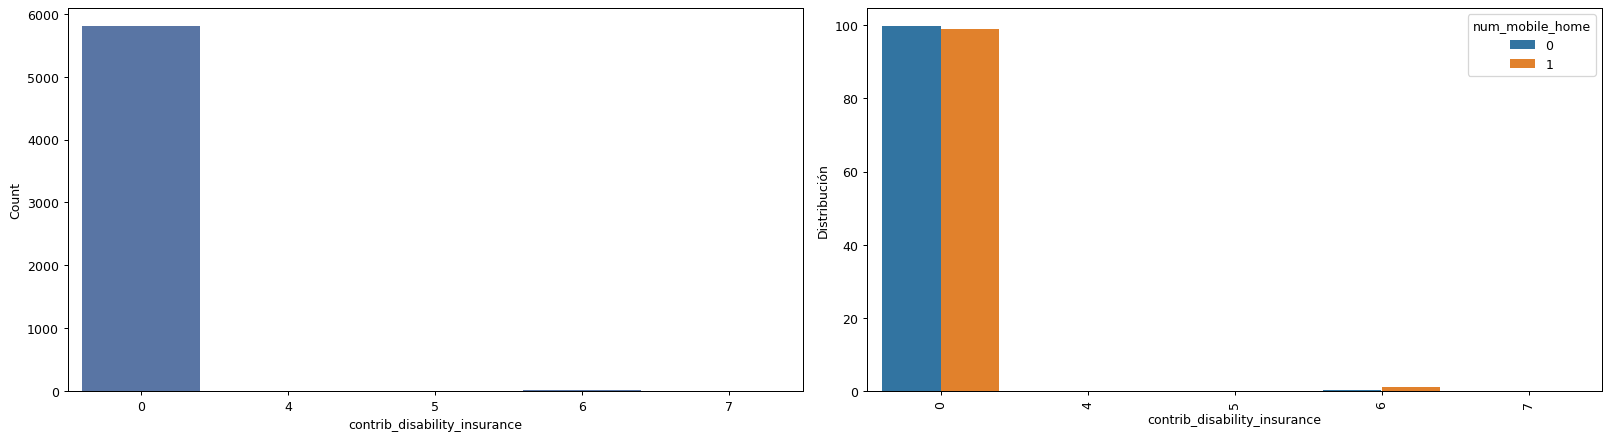

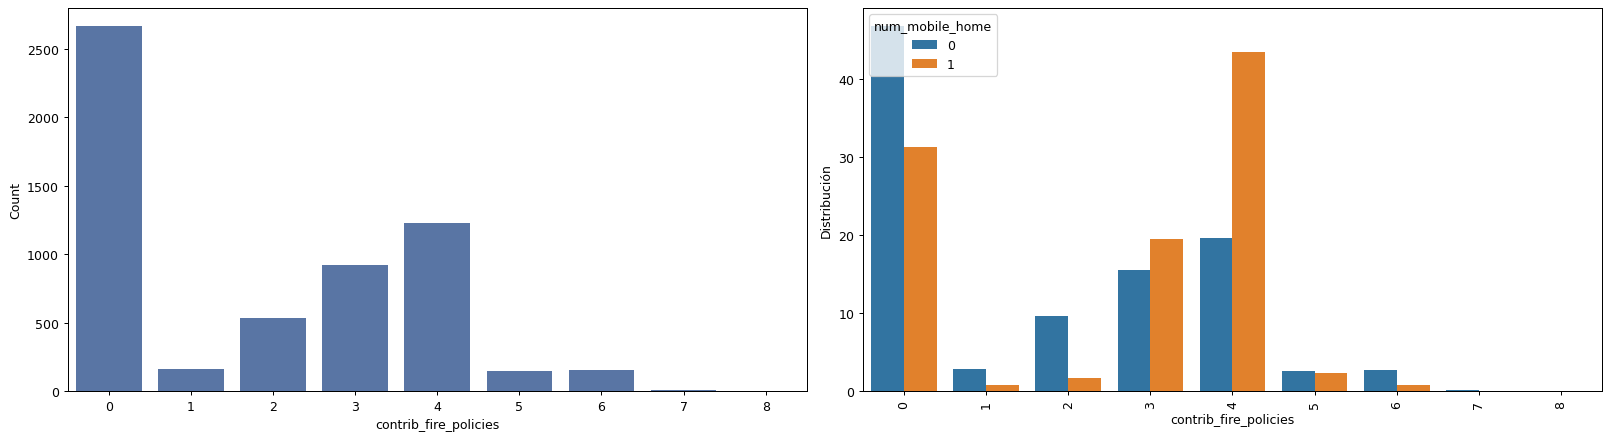

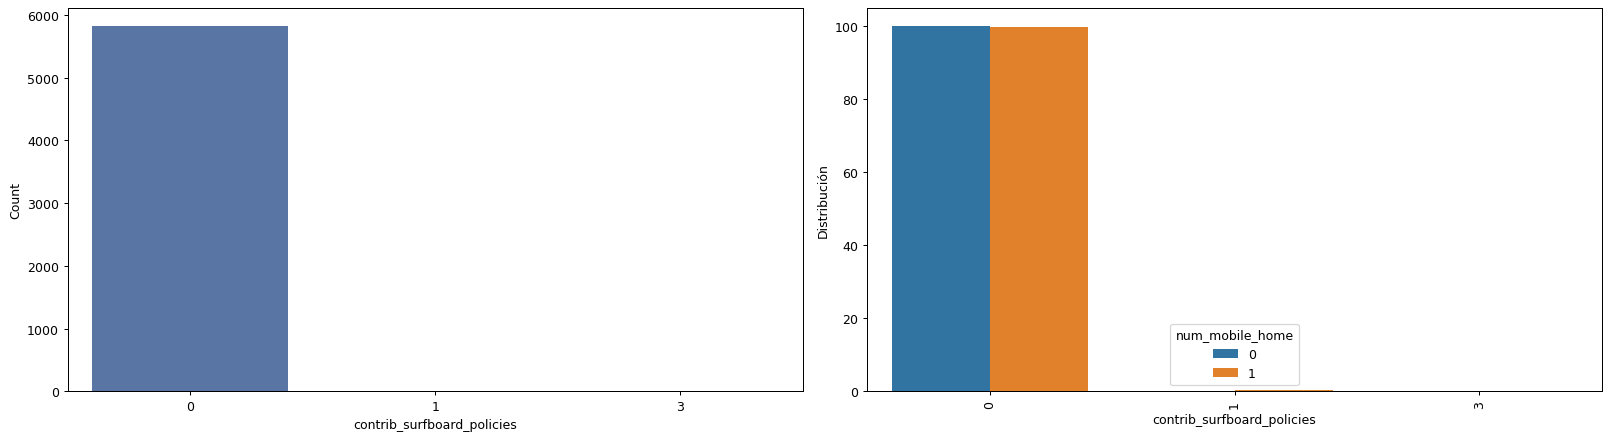

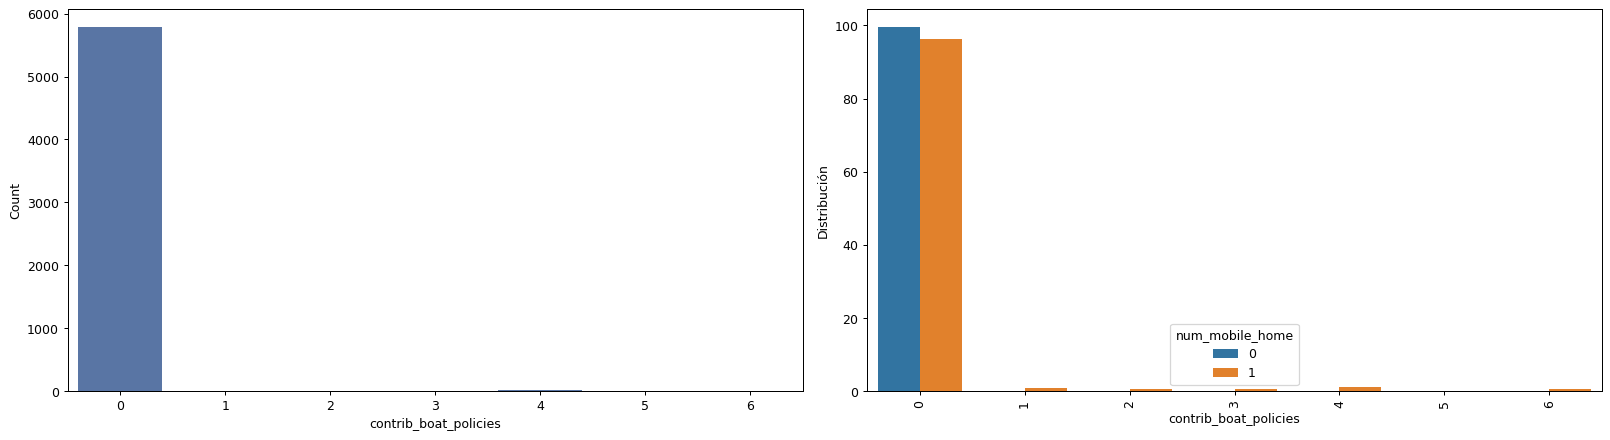

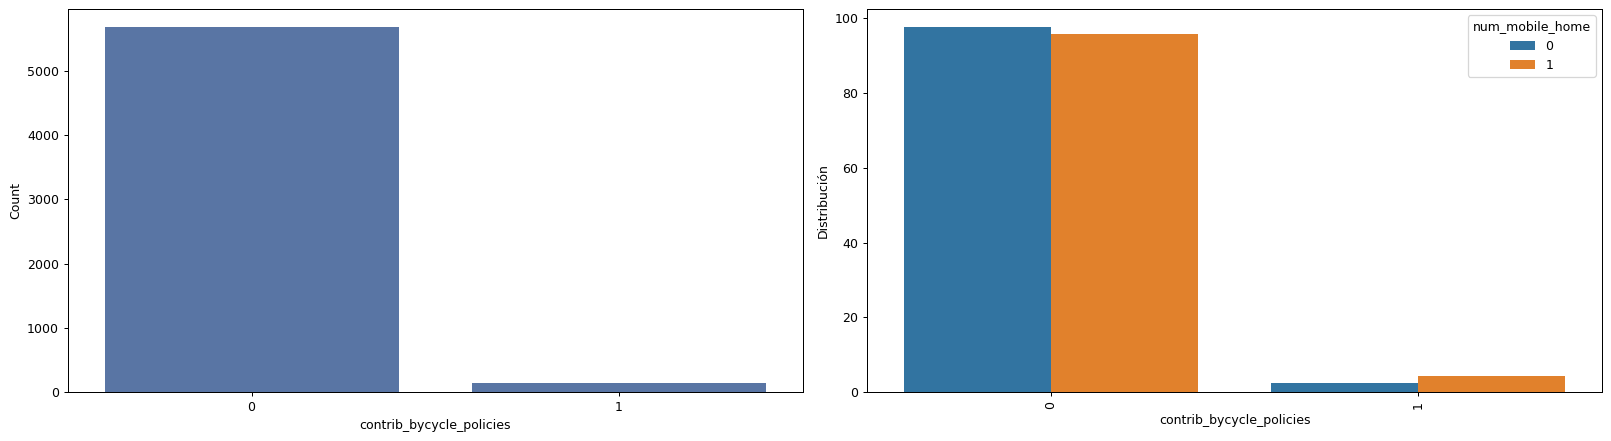

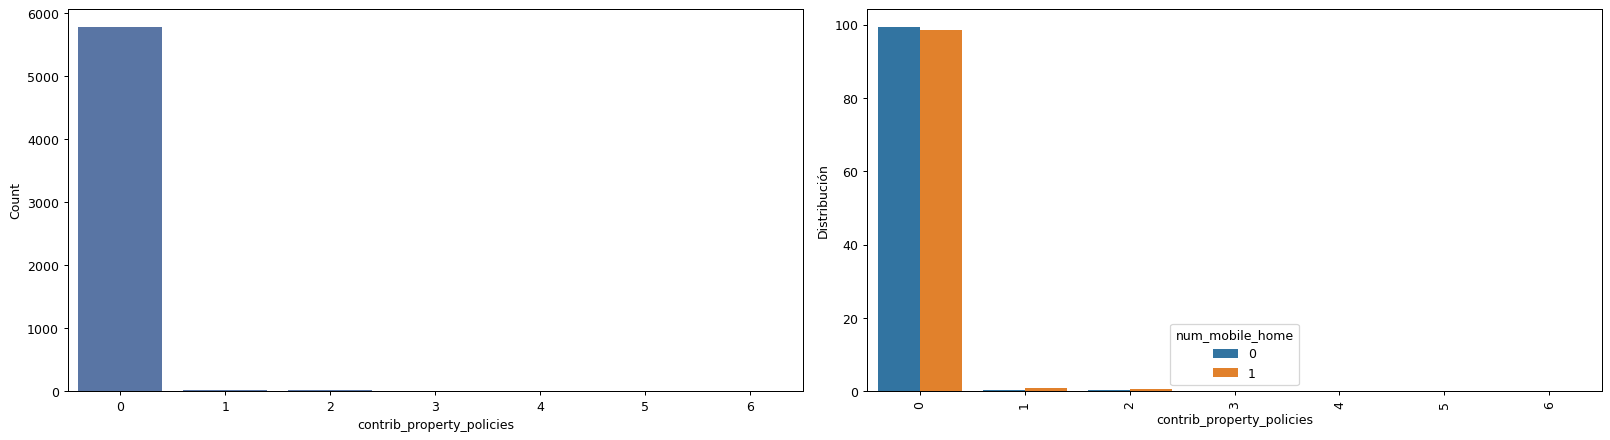

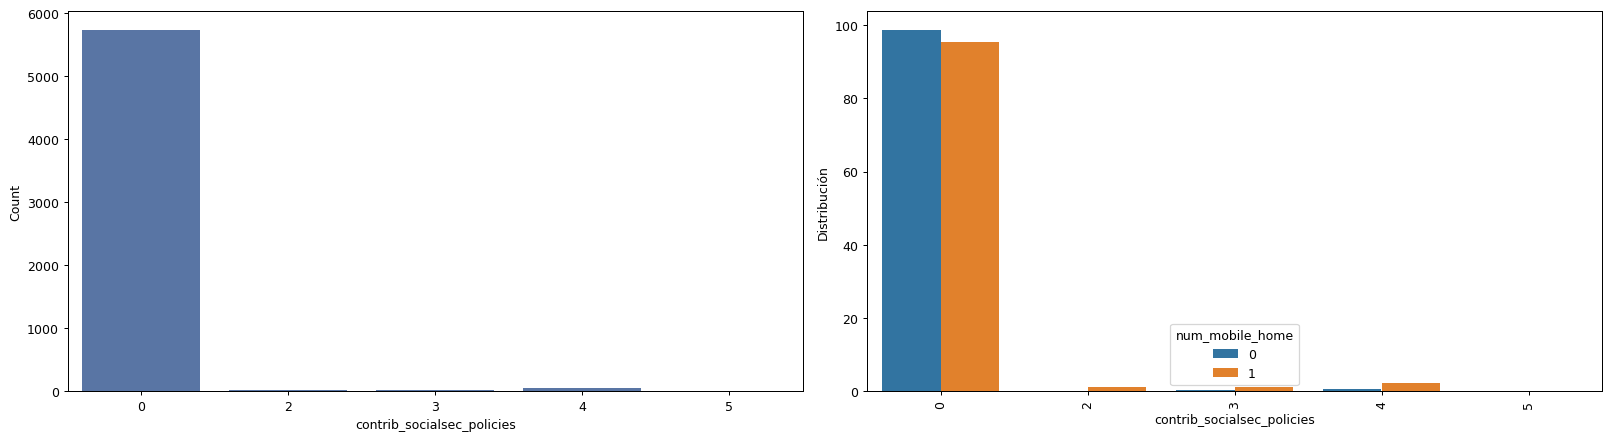

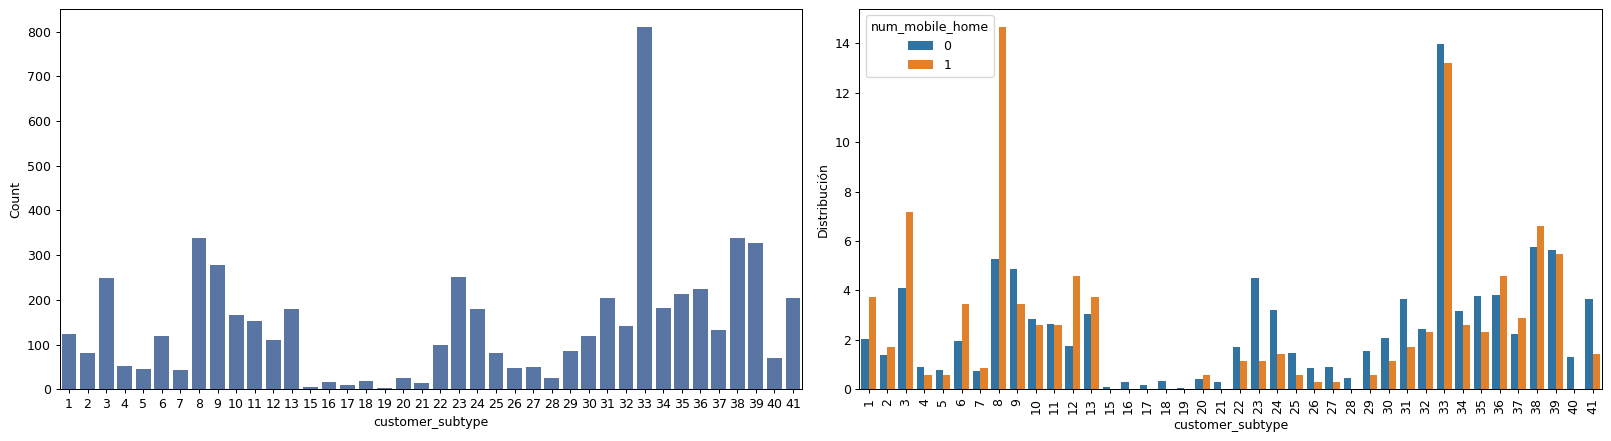

In [26]:
#Silenciamos los warnings
warnings.filterwarnings("ignore")

# Por cada columna diferente a la variable objetivo, graficar su distribución a la izquierda,
# a la derecha en función de la variable objetivo
for i in categoric_dataset.columns:
    if i != "num_mobile_home":
        plot_feature(categoric_dataset,i,"num_mobile_home")

Observadas todas las variables categóricas, nos centramos en aquellas más relacionadas con la variable objetivo. Ésta selección nos ha permitido obtener un perfil acerca de posibles clientes potenciales de seguro de autocaravana, por lo que tendremos que tenerlas muy en cuenta para el proceso de la creación del modelo.

Las personas más propensas a adquirir una póliza de autocaravana son aquellas con el siguiente perfil:

- Edad comprendida entre los 40-50 años. `avg_age`
- Familias con hijos ya casi adultos. `customer_maintype`
- Con estado civil de casado. `relation_married`
- Con unos estudios medios.`education_medlev`
- De clase media. `status_middle_management` y `customer_subtype`
- De clase baja con familia numerosa. `customer_subtype`
- Propietarios de al menos una casa. `home_owners`
- Con al menos un coche. `car_1`
- Mayoritariamente con afiliados a la seguridad social. `health national`
- Con rango de sueldo entre 30K y 75K dolares. `income_30_45` y `income_45_75`
- Tienen póliza de coche y pagan entre 1k y 5k de dolares. `contrib_car_policies`
- Tienen póliza contra incendios y pagan entre 200 y 500 de dolares. `contrib_fire_policies`

#### 3.4.2 Variables Numéricas

In [27]:
# Creamos DF con las variables numéricas.

numeric_dataset = training_dataset[['num_houses', 'household_size','num_private_third_party_insurance','num_third_party_firms','num_third_party_agric','num_car','num_van','num_motorcycle','num_lorry','num_trailer','num_tractor','num_agric_machines','num_moped','num_life_insurances',
                                    'num_private_accident_insurances','num_fam_accident_insurances','num_disability_insurances','num_fire','num_surfboard','num_boat','num_bycyle','num_property_insurance','num_socsec_insurance']]

# Comprobamos el nuevo DF
numeric_dataset.head()


,num_houses,household_size,num_private_third_party_insurance,num_third_party_firms,num_third_party_agric,num_car,num_van,num_motorcycle,num_lorry,num_trailer,...,num_life_insurances,num_private_accident_insurances,num_fam_accident_insurances,num_disability_insurances,num_fire,num_surfboard,num_boat,num_bycyle,num_property_insurance,num_socsec_insurance
0,1,3,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,2,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,3,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Mediante el coeficiente de correlación de Pearson procedemos a crear una matriz de correlación para ver que relación hay entre las diferentes variables numéricas. La representamos gráficamente:

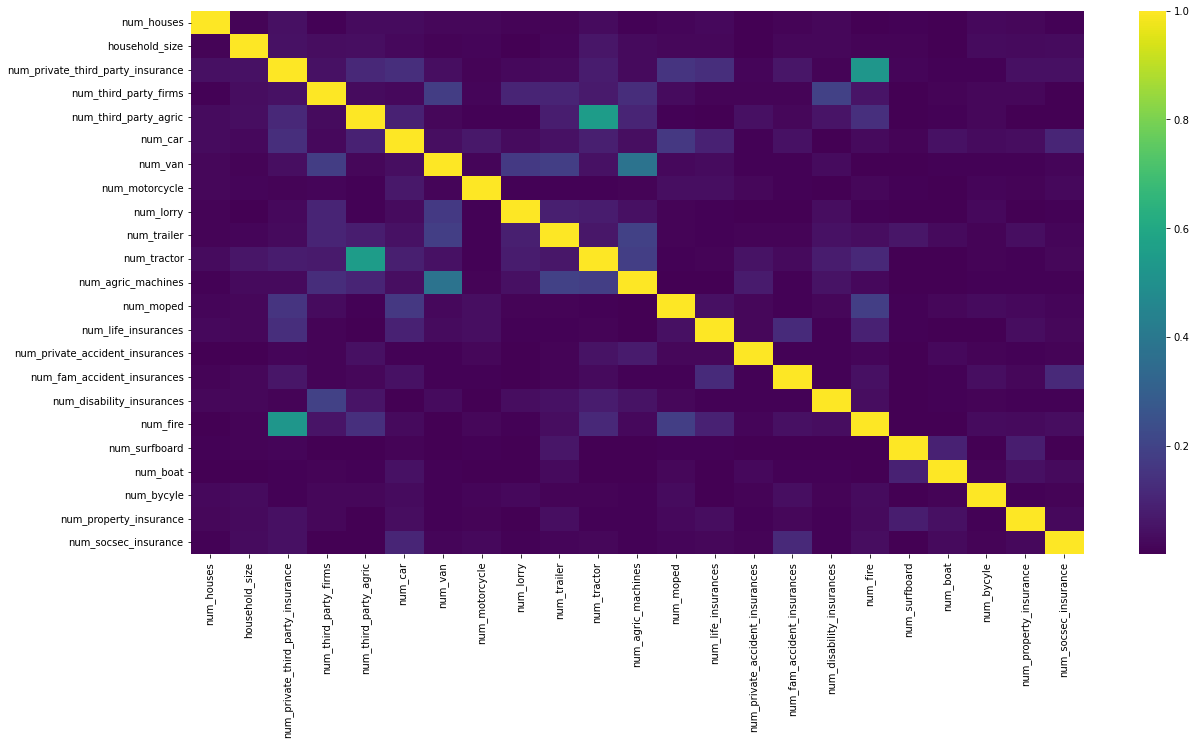

In [28]:
corr = numeric_dataset.corr(method = 'pearson')
plt.figure(figsize = (20, 10))
sns.heatmap(corr.abs(), cmap ='viridis' )
plt.show()

In [29]:
# Sacamos una lista de las correlaciones más fuertes, poniendo el umbral en 0.5
sorted_mat = corr.unstack().sort_values()

sorted_mat[sorted_mat > 0.5 ]

num_fire                           num_private_third_party_insurance    0.525261
num_private_third_party_insurance  num_fire                             0.525261
num_tractor                        num_third_party_agric                0.547175
num_third_party_agric              num_tractor                          0.547175
num_houses                         num_houses                           1.000000
num_agric_machines                 num_agric_machines                   1.000000
num_bycyle                         num_bycyle                           1.000000
household_size                     household_size                       1.000000
num_private_third_party_insurance  num_private_third_party_insurance    1.000000
num_third_party_firms              num_third_party_firms                1.000000
num_third_party_agric              num_third_party_agric                1.000000
num_car                            num_car                              1.000000
num_van                     

No hay una gran correlación entre las variables numéricas, por ello escogemos las más altas para analizarlas.

Observamos como aquellas personas que adquieren pólizas agrícolas de terceros también suelen adquirir pólizas de tractores.
Mientras que aquellas personas que adquieren pólizas privadas de terceros tambíen suelen adquirir pólizas contra incendios.

Para el análisis unicamente vamos a chequear los datos de training, por ello tras la transformación de las variables creamos un nuevo df con los valores de training llamado `training_dataset`.

### 3.5. Análisis de Outliers

Para realizar el análisis de outliers, comprobaremos detalladamente la distribución y los gráficos de cada variable numérica para confirmar si existen valores anómalos y estudiar que hacer con ellos. 

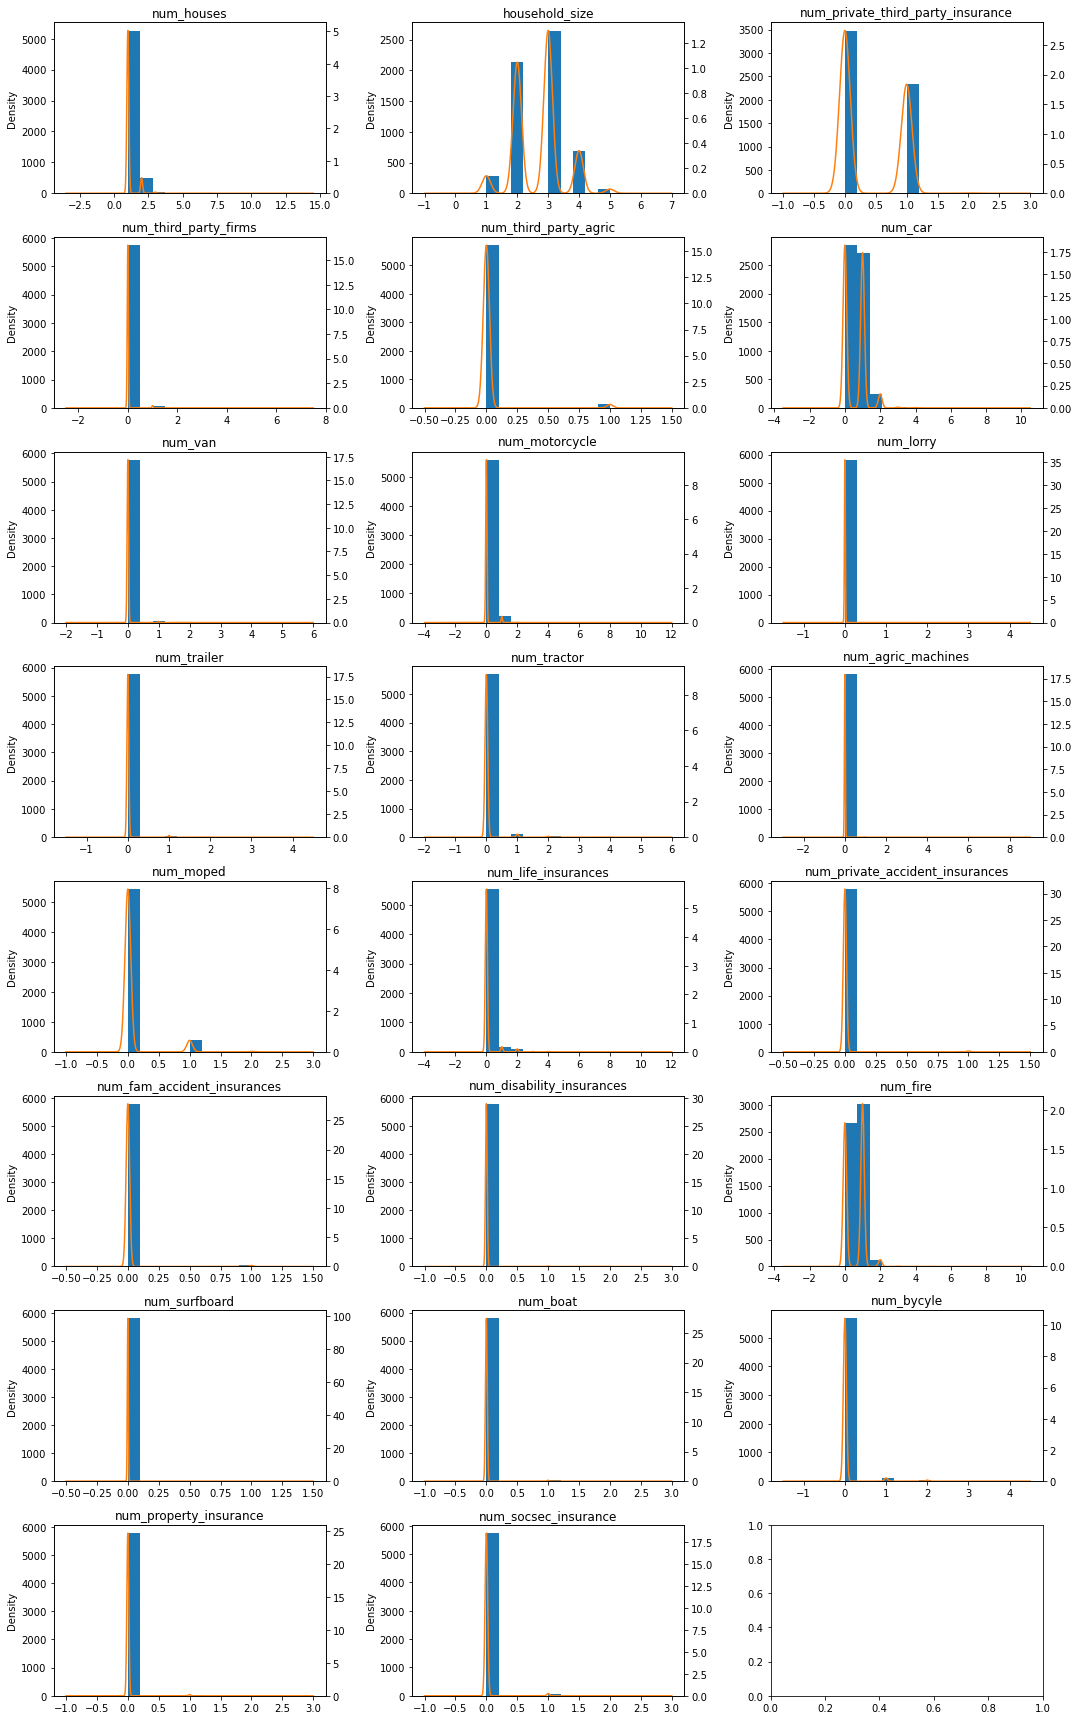

In [30]:
plot_histograms(numeric_dataset,3)

Observamos  como las distribución de las variables numéricas, principalmente las relacionadas con la titularidad de pólizas se encuentran distribuidas mayoritariamente en el 0. Observamos en polizas importantes como `num_fire`un gran número de personads tiene al menos un seguro, lo cual tiene sentido dado a la posible pérdida que podria causar un incendio. 

También en las polizas de coche `num_car` observamos que la mayor distribución se encuentra en 0 y 1, lo cual tiene sentido dado que al ser el seguro obligatorio, aquellas personas con coche tienen que contratarlo, mientras qu ela gente que no dispone coche no tiene necesidad.  

Es cierto que hay valores aislados en algunas variables con más de un seguro de titularidad, sin embargo, no se pueden considerar outliers dado que pueden pertenecer a gente de un mayor rango social y es necesario tenerlos también en cuenta para el estudio. Abajo encontramos algunos ejemplos:


#### 3.5.1 **Ejemplo de outliers**

Escogemos varias categorias realcionadas con automoviles para ver cual es la distribución del número de polizas contratadas y existencia de valores anómalos.

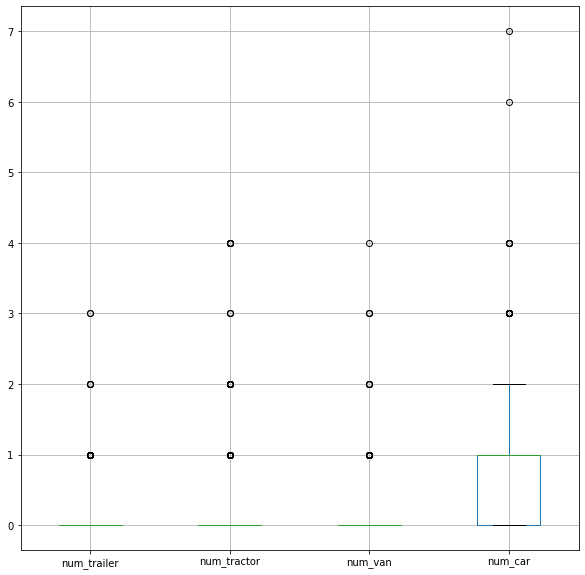

In [31]:
numeric_dataset.boxplot(['num_trailer', 'num_tractor', 'num_van', 'num_car'], figsize=(10,  10))
plt.show()

Observamos como en algún caso hay personas con incluso hasta más de 6 pólizas de coche, o más de una poliza en algún vehiculo sin embargo puede ser que se deba a que tenga un negocio, mayor rango salarial u otro atributo.

Es por esto que concluimos con que **NO hemos encontrado outliers destacables** que estuvieran fuera de contexto y debieramos depreciar. 

# 4. Conclusiones generales


A raíz de este análisis hemos podido comprender mejor los datos que tenemos y sus principales características. Además hemos detectado posibles problemas del mismo a los que tendremos que establecer algún tipo de solución para poder utilizar estos datos en el modelado.

A continuación enunciamos las conclusiones y principales ideas obtenidas:

- **Valores nulos**: Tras realizar el análisis de valores nulos, no hemos detectado ningún dato faltante.


- **Variable objetivo**: Hay un desbalanceo importante de la variable objetivo `num_mobile_home`. Existiendo un 94% de valores 0 y casi un 6% de valores 1. Es por ello que será antes de realizar el modelo será necesario realizar alguna transformación.


- **Formato de las variable**: Dado que todos los datos son de tipo entero, no hemos tenido que realizar ninguna transformación, debido a que estaban en un formato correcto.


- **Variables numéricas**: Entre las variables puramente numéricas (no categóricas) hemos observado como existe una baja correlación entre ellas a traves del coeficiente de Pearson. Hemos detectado una serie de variables que tenian una correlación algo mayor que el resto: `num_private_third_party_insurance` con `num_fire` ;`num_third_party_agric` con `num_tractor`. Sin embargo estas variables no tienen mucha relación con la variable objetivo, por lo que no van a ser de gran utilidad.


- **Variables categóricas**: Hemos observado la relación de las variables categóricas con la variable objetivo. Esto nos ha permitido identificar variables significativas para la creción del modelo, además de hacernos una idea de como es el perfil de persona que adquiere pólizas de autocaravana. Dado que las variables ya eran numéricas no ha habido necesidad de realizar ninguna transformación. Además dado el gran número de categorias que hay dentro de cada variable, no he visto óptimo realizar la técnica Onehot. Podríamos haber usado la técnica de target encoding, pero dada la naturaleza de los valores de las categorias he optado por no utilizarla ya que podría provocar una mayor confusión. 


- **Estudio de outliers**: Dentro de los valores de nuestro dataset, no hemos encontrado algún valor aislado destacable que debiera ser sacado del análisis.